<a href="https://colab.research.google.com/github/Jyotiraditya7/Time-series/blob/main/TDS_of_jalangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Plotly for interactive plots
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from pylab import rcParams
import math
import statsmodels.api as sms
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/content/drive/MyDrive/Jalangi.csv"
df = pd.read_csv(path)
df1=df
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to day/month/year
df = df.set_index(['Date'])
dfxg = df
df = df[['Total Dissolved Solids(TDS)']]
df.head()
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)

Shape of the data=  (172, 1)
Column datatypes= 
 Total Dissolved Solids(TDS)    float64
dtype: object


In [7]:
df.head()

Total Dissolved Solids(TDS)
Date                                   
2025-01-09                        178.0
2024-12-09                        232.0
2024-11-12                        220.0
2024-10-24                        162.0
2024-09-10                        142.0

In [8]:
df.tail()

Total Dissolved Solids(TDS)
Date                                   
2011-01-07                          NaN
2010-10-06                          NaN
2010-07-26                          NaN
2010-04-22                        256.0
2010-01-28                          NaN

In [9]:
df = df.sort_values(by='Date')

In [10]:
df.head()

Total Dissolved Solids(TDS)
Date                                   
2010-01-28                          NaN
2010-04-22                        256.0
2010-07-26                          NaN
2010-10-06                          NaN
2011-01-07                          NaN

In [11]:
df['Total Dissolved Solids(TDS)'].describe()

count    168.000000
mean     256.982143
std       81.495121
min       86.000000
25%      199.000000
50%      243.000000
75%      313.000000
max      452.000000
Name: Total Dissolved Solids(TDS), dtype: float64

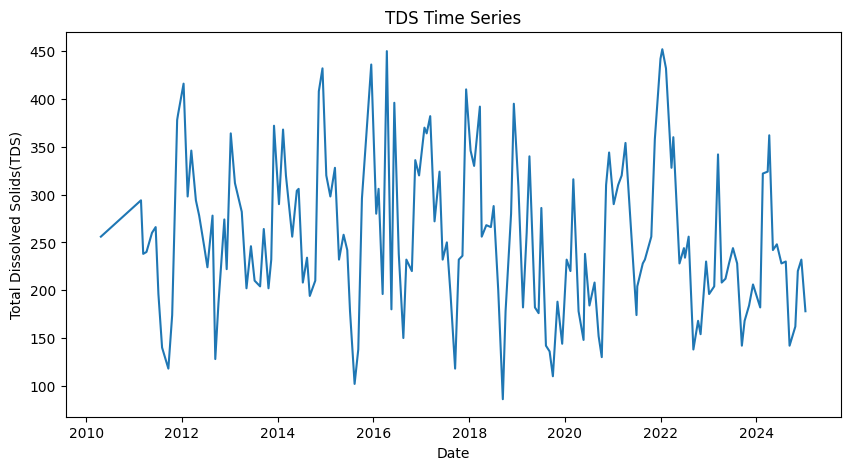

In [12]:
plt.figure(figsize=(10,5));
sns.lineplot(data=df,x=df.index,y=df['Total Dissolved Solids(TDS)']);
plt.title('TDS Time Series');

In [13]:
df['rollMean']  = df['Total Dissolved Solids(TDS)'].rolling(window=12).mean()
df['rollStd']  = df['Total Dissolved Solids(TDS)'].rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Total Dissolved Solids(TDS)'>

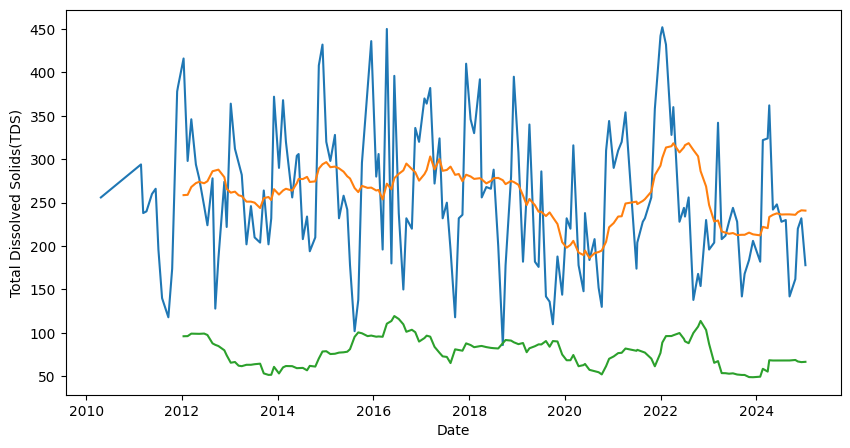

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Total Dissolved Solids(TDS)'])
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adfTest = adfuller(df['Total Dissolved Solids(TDS)'].dropna(),autolag='AIC',)

In [17]:
adfTest

(np.float64(-2.471378535576872),
 np.float64(0.12259443445995061),
 13,
 154,
 {'1%': np.float64(-3.473542528196209),
  '5%': np.float64(-2.880497674144038),
  '10%': np.float64(-2.576878053634677)},
 np.float64(1731.1892201678752))

In [18]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                  -2.471379
p-value                          0.122594
#lags used                      13.000000
number of observations used    154.000000
dtype: float64

In [19]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)


criticality 1% : -3.473542528196209
criticality 5% : -2.880497674144038
criticality 10% : -2.576878053634677


In [20]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

In [21]:
air_df = df[['Total Dissolved Solids(TDS)']]
air_df.head()

Total Dissolved Solids(TDS)
Date                                   
2010-01-28                          NaN
2010-04-22                        256.0
2010-07-26                          NaN
2010-10-06                          NaN
2011-01-07                          NaN

In [22]:
air_df['shift'] = air_df['Total Dissolved Solids(TDS)'].shift()
air_df['shiftDiff'] = air_df['Total Dissolved Solids(TDS)']- air_df['shift']
air_df.head()


Total Dissolved Solids(TDS)  shift  shiftDiff
Date                                                     
2010-01-28                          NaN    NaN        NaN
2010-04-22                        256.0    NaN        NaN
2010-07-26                          NaN  256.0        NaN
2010-10-06                          NaN    NaN        NaN
2011-01-07                          NaN    NaN        NaN

Test Statistic                  -5.262660
p-value                          0.000007
#lags used                      12.000000
number of observations used    153.000000
dtype: float64
criticality 1% : -3.473829775724492
criticality 5% : -2.880622899711496
criticality 10% : -2.5769448985432954


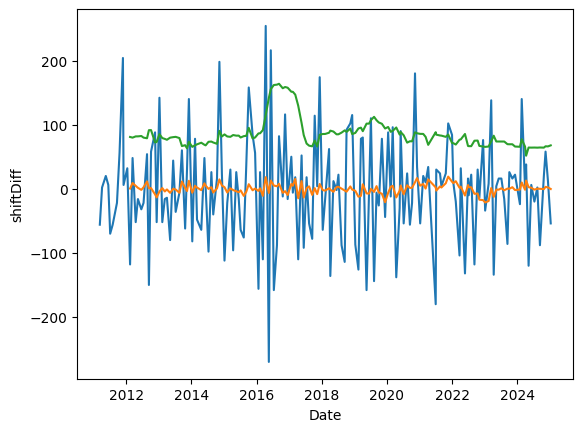

In [23]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [24]:
log_df = df[['Total Dissolved Solids(TDS)']]
log_df['log'] = np.log(log_df['Total Dissolved Solids(TDS)'])
log_df.head()


Total Dissolved Solids(TDS)       log
Date                                             
2010-01-28                          NaN       NaN
2010-04-22                        256.0  5.545177
2010-07-26                          NaN       NaN
2010-10-06                          NaN       NaN
2011-01-07                          NaN       NaN

Test Statistic                  -2.327281
p-value                          0.163320
#lags used                      13.000000
number of observations used    154.000000
dtype: float64
criticality 1% : -3.473542528196209
criticality 5% : -2.880497674144038
criticality 10% : -2.576878053634677


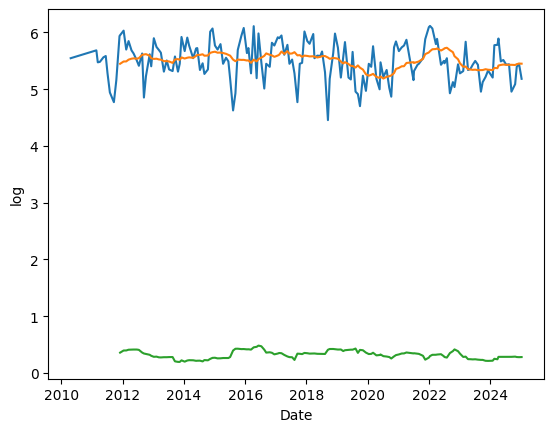

In [25]:
test_stationarity(log_df.dropna(),'log')

In [26]:
sqrt_df = df[['Total Dissolved Solids(TDS)']]
sqrt_df['sqrt'] = np.sqrt(df['Total Dissolved Solids(TDS)'])
sqrt_df.head()

Total Dissolved Solids(TDS)  sqrt
Date                                         
2010-01-28                          NaN   NaN
2010-04-22                        256.0  16.0
2010-07-26                          NaN   NaN
2010-10-06                          NaN   NaN
2011-01-07                          NaN   NaN

Test Statistic                  -2.396042
p-value                          0.142857
#lags used                      13.000000
number of observations used    154.000000
dtype: float64
criticality 1% : -3.473542528196209
criticality 5% : -2.880497674144038
criticality 10% : -2.576878053634677


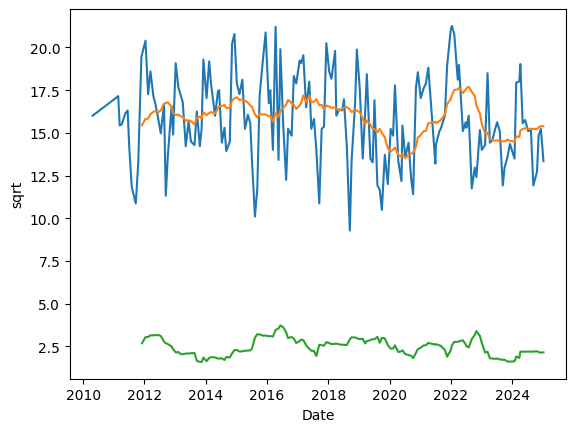

In [27]:
test_stationarity(sqrt_df.dropna(),'sqrt')

In [28]:
cbrt_df = df[['Total Dissolved Solids(TDS)']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['Total Dissolved Solids(TDS)'])
cbrt_df.head()


Total Dissolved Solids(TDS)      cbrt
Date                                             
2010-01-28                          NaN       NaN
2010-04-22                        256.0  6.349604
2010-07-26                          NaN       NaN
2010-10-06                          NaN       NaN
2011-01-07                          NaN       NaN

Test Statistic                  -2.371870
p-value                          0.149834
#lags used                      13.000000
number of observations used    154.000000
dtype: float64
criticality 1% : -3.473542528196209
criticality 5% : -2.880497674144038
criticality 10% : -2.576878053634677


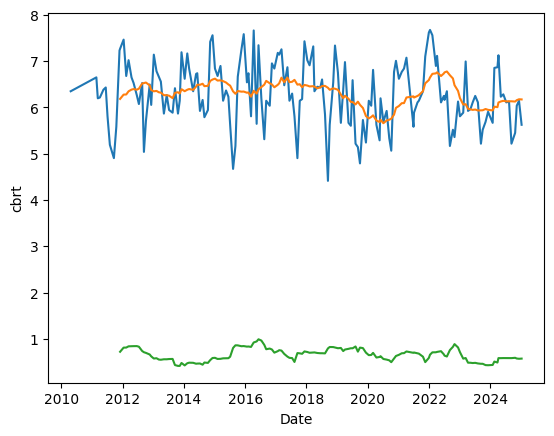

In [29]:
test_stationarity(cbrt_df.dropna(),'cbrt')

In [30]:
log_df2 = log_df[['Total Dissolved Solids(TDS)','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

Total Dissolved Solids(TDS)       log  log_sqrt  logShiftDiff
Date                                                                     
2010-01-28                          NaN       NaN       NaN           NaN
2010-04-22                        256.0  5.545177   2.35482           NaN
2010-07-26                          NaN       NaN       NaN           NaN
2010-10-06                          NaN       NaN       NaN           NaN
2011-01-07                          NaN       NaN       NaN           NaN

Test Statistic                  -5.482405
p-value                          0.000002
#lags used                      12.000000
number of observations used    153.000000
dtype: float64
criticality 1% : -3.473829775724492
criticality 5% : -2.880622899711496
criticality 10% : -2.5769448985432954


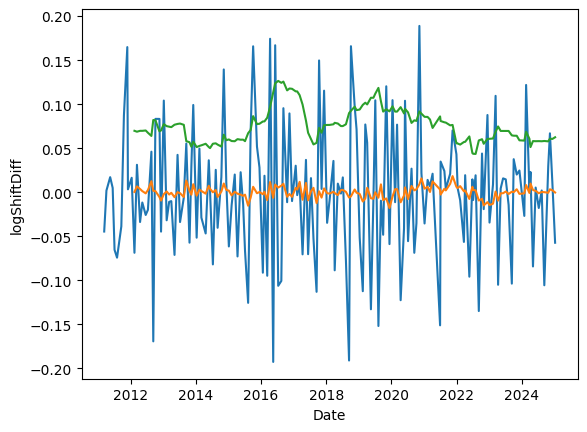

In [31]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [32]:
log_shift = df[['Total Dissolved Solids(TDS)']].copy(deep=True)
log_shift['log'] = np.log(log_shift['Total Dissolved Solids(TDS)'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()


Total Dissolved Solids(TDS)       log  logShift  logShiftDiff
Date                                                                     
2010-01-28                          NaN       NaN       NaN           NaN
2010-04-22                        256.0  5.545177       NaN           NaN
2010-07-26                          NaN       NaN  5.545177           NaN
2010-10-06                          NaN       NaN       NaN           NaN
2011-01-07                          NaN       NaN       NaN           NaN

Test Statistic                  -5.456680
p-value                          0.000003
#lags used                      12.000000
number of observations used    153.000000
dtype: float64
criticality 1% : -3.473829775724492
criticality 5% : -2.880622899711496
criticality 10% : -2.5769448985432954


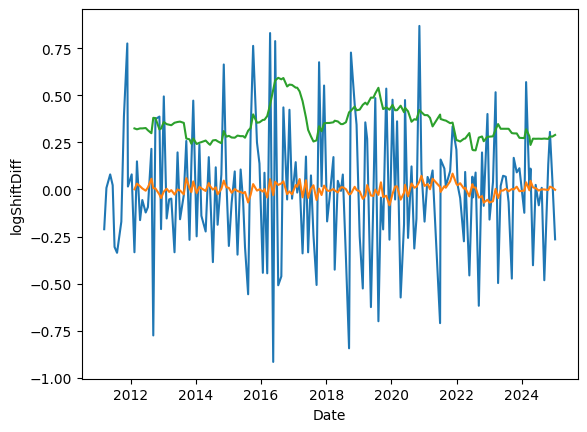

In [33]:
test_stationarity(log_shift.dropna(),'logShiftDiff')


In [34]:
airP = df[['Total Dissolved Solids(TDS)']].copy(deep=True)
airP['firstDiff'] = airP['Total Dissolved Solids(TDS)'].diff()
airP['Diff12'] = airP['Total Dissolved Solids(TDS)'].diff(12)


In [35]:
airP.head()

Total Dissolved Solids(TDS)  firstDiff  Diff12
Date                                                      
2010-01-28                          NaN        NaN     NaN
2010-04-22                        256.0        NaN     NaN
2010-07-26                          NaN        NaN     NaN
2010-10-06                          NaN        NaN     NaN
2011-01-07                          NaN        NaN     NaN

Outlier

In [36]:
df['Total Dissolved Solids(TDS)']

Date
2010-01-28      NaN
2010-04-22    256.0
2010-07-26      NaN
2010-10-06      NaN
2011-01-07      NaN
              ...  
2024-09-10    142.0
2024-10-24    162.0
2024-11-12    220.0
2024-12-09    232.0
2025-01-09    178.0
Name: Total Dissolved Solids(TDS), Length: 172, dtype: float64

In [37]:
nan_count = df['Total Dissolved Solids(TDS)'].isna().sum()
print(f"Number of NaN values: {nan_count}")

Number of NaN values: 4


In [38]:
df['Total Dissolved Solids(TDS)']=df['Total Dissolved Solids(TDS)'].fillna(0)

In [39]:
zero_count = (df['Total Dissolved Solids(TDS)'] == 0.0).sum()
print(f"Number of 0.0 values: {zero_count}")



Number of 0.0 values: 4


In [40]:
median_value = df.loc[df['Total Dissolved Solids(TDS)'] != 0.0, 'Total Dissolved Solids(TDS)'].median()
df['Total Dissolved Solids(TDS)'] = df['Total Dissolved Solids(TDS)'].replace(0.0, median_value)


In [41]:
zero_count = (df['Total Dissolved Solids(TDS)'] == 0.0).sum()
print(f"Number of 0.0 values: {zero_count}")

Number of 0.0 values: 0


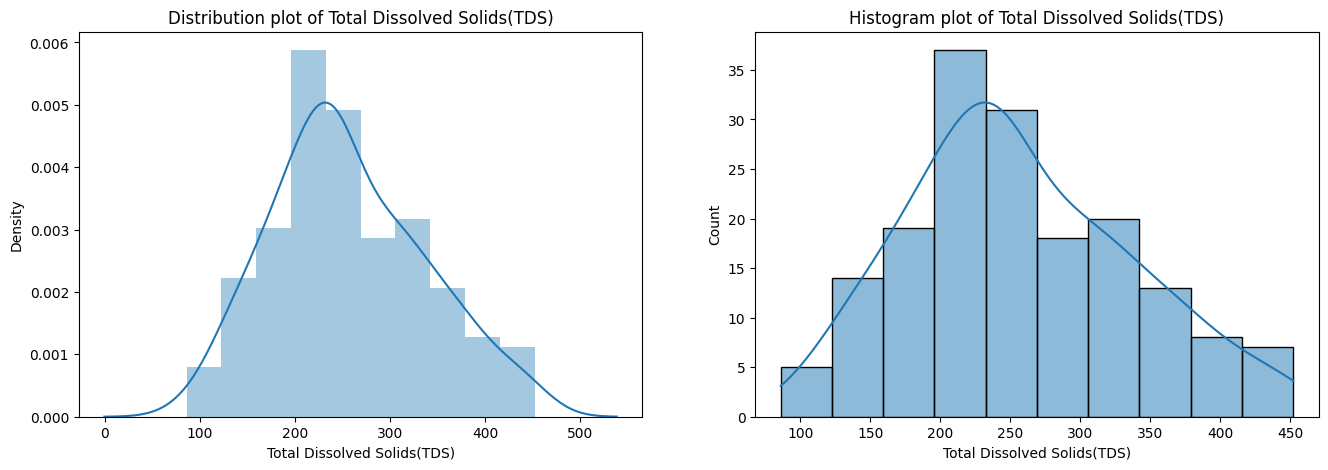

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Distribution plot of Total Dissolved Solids(TDS)')
sns.distplot(df['Total Dissolved Solids(TDS)'])
plt.subplot(1,2,2)
sns.histplot(df['Total Dissolved Solids(TDS)'], kde=True)
plt.title('Histogram plot of Total Dissolved Solids(TDS)')
plt.show()

We know that this is left skewed data
IQR is applied on either left or right-skewed data.

In [43]:
df['Total Dissolved Solids(TDS)']

Date
2010-01-28    243.0
2010-04-22    256.0
2010-07-26    243.0
2010-10-06    243.0
2011-01-07    243.0
              ...  
2024-09-10    142.0
2024-10-24    162.0
2024-11-12    220.0
2024-12-09    232.0
2025-01-09    178.0
Name: Total Dissolved Solids(TDS), Length: 172, dtype: float64

In [44]:
df['Total Dissolved Solids(TDS)'].describe()

count    172.000000
mean     256.656977
std       80.564048
min       86.000000
25%      201.500000
50%      243.000000
75%      310.500000
max      452.000000
Name: Total Dissolved Solids(TDS), dtype: float64

<Axes: >

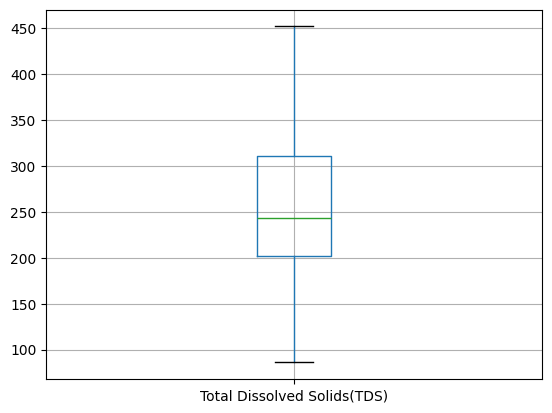

In [45]:
df.boxplot(column=['Total Dissolved Solids(TDS)'])

<Axes: ylabel='Total Dissolved Solids(TDS)'>

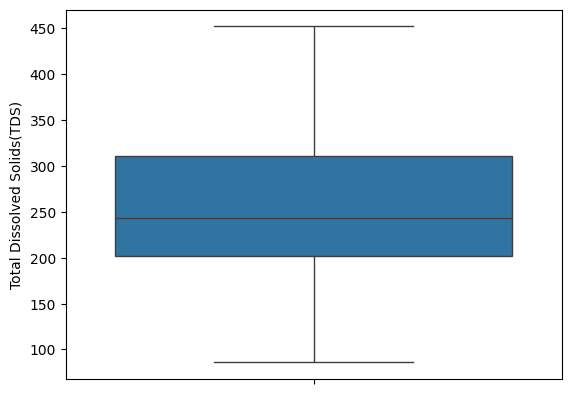

In [46]:
sns.boxplot(df['Total Dissolved Solids(TDS)'])

In [47]:
percentile25 = df['Total Dissolved Solids(TDS)'].quantile(0.25)
percentile75 = df['Total Dissolved Solids(TDS)'].quantile(0.75)

In [48]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  310.5
25th quartile:  201.5


In [49]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  109.0


In [50]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 474.0
Lower limit 38.0


In [51]:
df[df['Total Dissolved Solids(TDS)'] > upper_limit]

Empty DataFrame
Columns: [Total Dissolved Solids(TDS), rollMean, rollStd]
Index: []

In [52]:
df[df['Total Dissolved Solids(TDS)'] < lower_limit]

Empty DataFrame
Columns: [Total Dissolved Solids(TDS), rollMean, rollStd]
Index: []

therefore outliers present

In [53]:
df['Total Dissolved Solids(TDS)'] = np.where(df['Total Dissolved Solids(TDS)'] > upper_limit, upper_limit,
            np.where(df['Total Dissolved Solids(TDS)'] < lower_limit, lower_limit, df['Total Dissolved Solids(TDS)']))

In [54]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [55]:
airP = df[['Total Dissolved Solids(TDS)']].copy(deep=True)

In [56]:
train = airP[:round(len(airP)*75/100)]
test = airP[round(len(airP)*75/100):]
test.head()

Total Dissolved Solids(TDS)
Date                                   
2021-07-06                        204.0
2021-08-17                        228.0
2021-09-02                        232.0
2021-10-21                        256.0
2021-11-17                        358.0

In [57]:
test.index[0]

Timestamp('2021-07-06 00:00:00')

In [ ]:
test.index[-1]

Timestamp('2025-01-09 00:00:00')

# **Arima**

In [ ]:
train['Total Dissolved Solids(TDS)']

Date
2010-01-28    243.0
2010-04-22    256.0
2010-07-26    243.0
2010-10-06    243.0
2011-01-07    243.0
              ...  
2020-04-14    178.0
2020-05-22    148.0
2020-06-02    238.0
2020-07-06    184.0
2020-08-14    208.0
Name: Total Dissolved Solids(TDS), Length: 120, dtype: float64

Train performance

+---------+---------+---------+----------+----------+
|         |     MSE |    RMSE |     MAPE |      R^2 |
+=========+=========+=========+==========+==========+
| Metrics | 4294.28 | 65.5307 | 0.232129 | 0.340519 |
+---------+---------+---------+----------+----------+


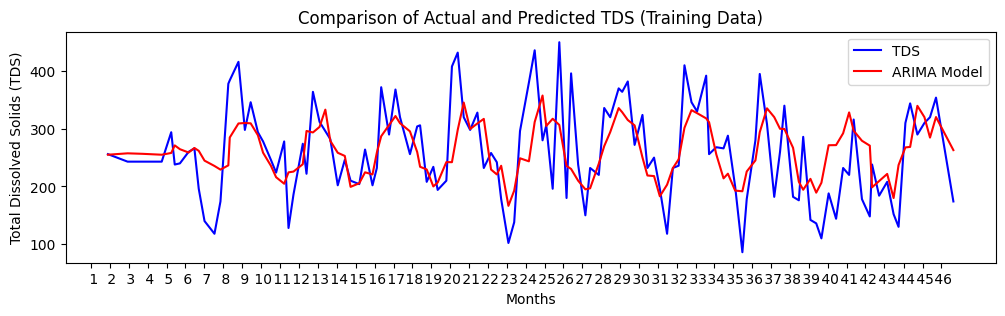

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
from tabulate import tabulate

# Train ARIMA model on training data
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=(4,0,4))#4,1,3
model_fit = model.fit()

# Generate predictions on training data
train_prediction = model_fit.predict(start=1, end=len(train) - 1)
train_prediction.index = train.index[1:]  # Align predictions with training index
arima_pred = train_prediction
# Calculate metrics
mse = mean_squared_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
r2 = r2_score(train['Total Dissolved Solids(TDS)'][1:], train_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values
plt.figure(figsize=(12,3))
plt.plot(train.index[1:], train['Total Dissolved Solids(TDS)'][1:], label='TDS', color='blue')
plt.plot(train.index[1:], train_prediction, label='ARIMA Model', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Training Data)')
plt.legend()

# Format x-axis with months in intervals of 3
xticks = pd.date_range(start=train.index.min(), end=train.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()


Test performance

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.8 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1687.904, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1416.447, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1585.197, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1404.936, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1406.592, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1386.291, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1402.566, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1391.423, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1379.574, Time=0.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1378.958, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1382.725, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1377.0

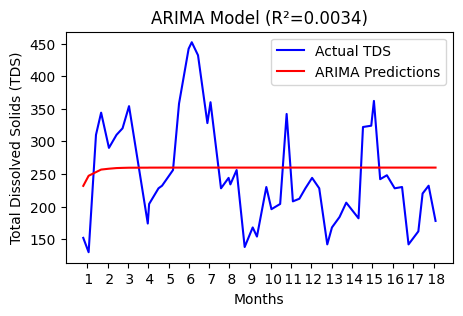

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# Fit Auto ARIMA model
auto_model = auto_arima(train['Total Dissolved Solids(TDS)'], seasonal=False, stepwise=True, trace=True)

# Extract best order
best_order = auto_model.order
print(f"Selected ARIMA order: {best_order}")

# Train ARIMA model with the best order
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=best_order)
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=train.shape[0], end=train.shape[0] + len(test) - 1)
prediction.index = test.index

# Calculate initial R² score
r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)
print(f"Initial R² Score: {r2}")

# Keep running until R² is positive
while r2 < 0:
    best_order = (best_order[0] + 1, best_order[1], best_order[2] + 1)  # Adjust order
    model = ARIMA(train['Total Dissolved Solids(TDS)'], order=best_order)
    model_fit = model.fit()
    prediction = model_fit.predict(start=train.shape[0], end=train.shape[0] + len(test) - 1)
    prediction.index = test.index
    r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)
    print(f"Trying ARIMA{best_order}, New R²: {r2}")

# Plot test values and predictions
plt.figure(figsize=(5, 3))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='Actual TDS', color='blue')
plt.plot(test.index, prediction, label='ARIMA Predictions', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title(f'ARIMA Model (R²={r2:.4f})')
plt.legend()

# Format x-axis with months in intervals of 3
xticks = pd.date_range(start=test.index.min(), end=test.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()


In [ ]:
# Calculate metrics
mse = mean_squared_error(test['Total Dissolved Solids(TDS)'], prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Total Dissolved Solids(TDS)'], prediction)
r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)

# Handle zero values for MAPE
non_zero_indices = test['Total Dissolved Solids(TDS)'] != 0
y_test_non_zero = test['Total Dissolved Solids(TDS)'][non_zero_indices]
predictions_non_zero = prediction[non_zero_indices]

if len(y_test_non_zero) == len(predictions_non_zero):
    mape_non_zero = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
else:
    mape_non_zero = "Error: Non-zero lengths mismatch"

# Display metrics in tabular format
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "MAPE (excl. zeros)": [mape_non_zero],
    "R^2": [r2]
}
metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+--------+---------+----------+----------------------+------------+
|         |    MSE |    RMSE |     MAPE |   MAPE (excl. zeros) |        R^2 |
+=========+========+=========+==========+======================+============+
| Metrics | 6389.7 | 79.9356 | 0.299868 |              29.9868 | 0.00335923 |
+---------+--------+---------+----------+----------------------+------------+


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Total Dissolved Solids(TDS)'],prediction))

# Calculate Relative RMSE
mean_actual = test['Total Dissolved Solids(TDS)'].mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = test['Total Dissolved Solids(TDS)'].max() - test['Total Dissolved Solids(TDS)'].min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  79.935589
1    Relative RMSE   0.320680
2  Normalized RMSE   0.248247


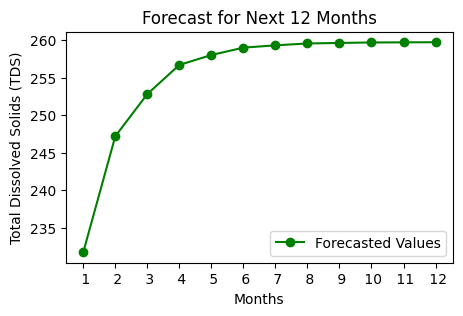

In [ ]:
# Plot the forecast
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(5,3))
plt.plot(range(1, forecast_steps + 1), forecast, label='Forecasted Values', color='green', marker='o')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Forecast for Next 12 Months')
plt.xticks(range(1, forecast_steps + 1), [f" {i}" for i in range(1, forecast_steps + 1)])
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Sarimax**

In [ ]:
model = SARIMAX(train['Total Dissolved Solids(TDS)'],order=(1,1,1),seasonal_order=(1,1,1,12))
start_index = airP.index.get_loc(test.index[0])
end_index = airP.index.get_loc(test.index[-1])
model_fit = model.fit()
prediction = model_fit.predict(start=start_index,end=end_index)
prediction.index = test.index
airP['sarimaxPred'] = prediction

In [ ]:
#og
model = SARIMAX(train['Total Dissolved Solids(TDS)'],order=(4,1,3),seasonal_order=(4,1,3,12))
start_index = airP.index.get_loc(test.index[0])
end_index = airP.index.get_loc(test.index[-1])
model_fit = model.fit()
prediction = model_fit.predict(start=start_index,end=end_index)
prediction.index = test.index
airP['sarimaxPred'] = prediction

+---------+---------+---------+----------+----------+
|         |     MSE |    RMSE |     MAPE |      R^2 |
+=========+=========+=========+==========+==========+
| Metrics | 4426.56 | 66.5324 | 0.236487 | 0.320205 |
+---------+---------+---------+----------+----------+


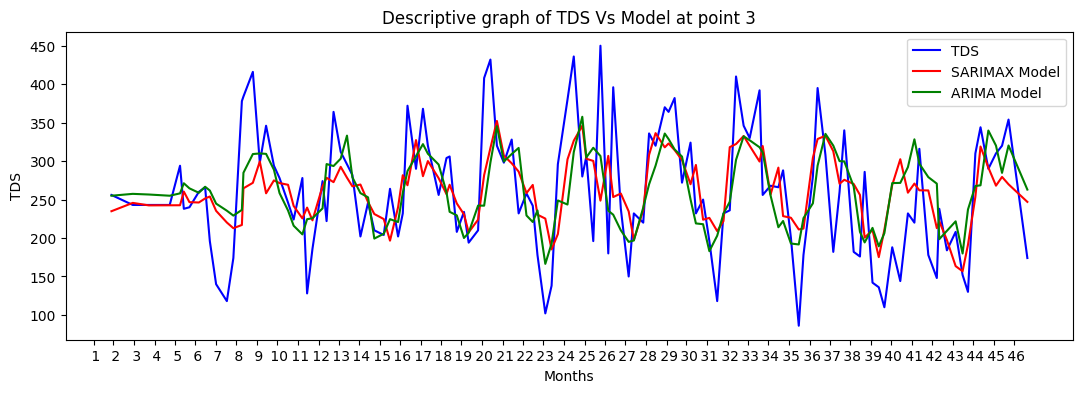

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
from tabulate import tabulate

# Train SARIMAX model on training data
model = SARIMAX(train['Total Dissolved Solids(TDS)'], order=(2,0,1), seasonal_order=(2,0,1, 12))# 2,0,1   2,0,1,12
model_fit = model.fit(disp=False)

# Generate predictions on training data
train_prediction = model_fit.predict(start=1, end=len(train) - 1)
train_prediction.index = train.index[1:]  # Align predictions with training index

# Calculate metrics
mse = mean_squared_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
r2 = r2_score(train['Total Dissolved Solids(TDS)'][1:], train_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values
plt.figure(figsize=(13, 4))
plt.plot(train.index[1:], train['Total Dissolved Solids(TDS)'][1:], label='TDS', color='blue')
plt.plot(train.index[1:], train_prediction, label='SARIMAX Model', color='red')
plt.plot(train.index[1:], arima_pred, label='ARIMA Model', color='green')
plt.xlabel('Months')
plt.ylabel('TDS')
plt.title('Descriptive graph of TDS Vs Model at point 3')
plt.legend()

# Format x-axis to show months as 1, 4, 7, etc.
xticks = pd.date_range(start=train.index.min(), end=train.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()

+---------+---------+---------+----------+---------+
|         |     MSE |    RMSE |     MAPE |     R^2 |
+=========+=========+=========+==========+=========+
| Metrics | 5347.22 | 73.1247 | 0.214559 | 0.16596 |
+---------+---------+---------+----------+---------+


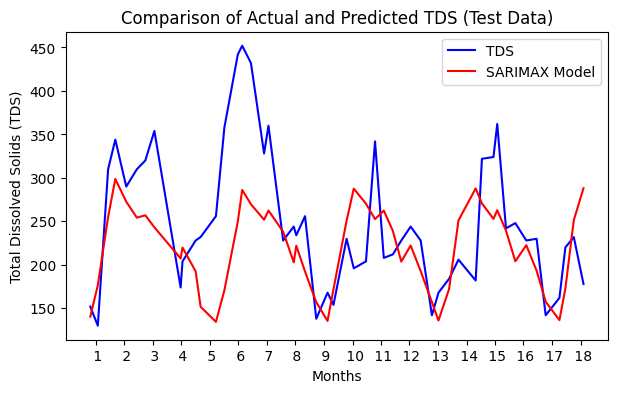

In [ ]:
# Generate predictions on test data
start_index = train.shape[0]
end_index = train.shape[0] + len(test) - 1
test_prediction = model_fit.predict(start=start_index, end=end_index)
test_prediction.index = test.index  # Align predictions with test index

# Calculate metrics for test data
mse = mean_squared_error(test['Total Dissolved Solids(TDS)'], test_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Total Dissolved Solids(TDS)'], test_prediction)
r2 = r2_score(test['Total Dissolved Solids(TDS)'], test_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values for test data
plt.figure(figsize=(7, 4))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='TDS', color='blue')
plt.plot(test.index, test_prediction, label='SARIMAX Model', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Test Data)')
plt.legend()

# Format x-axis to show months as 1, 4, 7, etc.
xticks = pd.date_range(start=test.index.min(), end=test.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()



In [ ]:
rmse = np.sqrt(mean_squared_error(test['Total Dissolved Solids(TDS)'],test_prediction))

# Calculate Relative RMSE
mean_actual = test['Total Dissolved Solids(TDS)'].mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = test['Total Dissolved Solids(TDS)'].max() - test['Total Dissolved Solids(TDS)'].min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  73.124718
1    Relative RMSE   0.293356
2  Normalized RMSE   0.227095


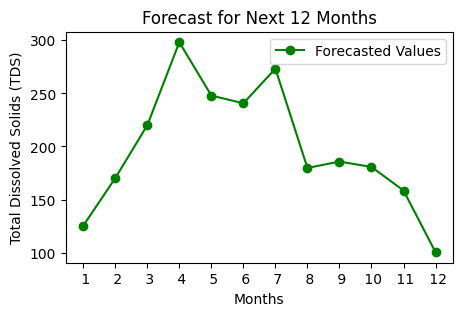

In [ ]:
# Plot the forecast
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(5,3))
plt.plot(range(1, forecast_steps + 1), forecast, label='Forecasted Values', color='green', marker='o')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Forecast for Next 12 Months')
plt.xticks(range(1, forecast_steps + 1), [f" {i}" for i in range(1, forecast_steps + 1)])
plt.legend()
plt.show()

backtest

In [59]:
path = "/content/drive/MyDrive/backtest jalangi.csv"
db = pd.read_csv(path)
db1=db
db['Date'] = pd.to_datetime(db['Date'], format='%d/%m/%Y') # Changed format to day/month/year
db = db.set_index(['Date'])
dbxg = db
db = db[['Total Dissolved Solids(TDS)']]
db.head()
print('Shape of the data= ', db.shape)
print('Column datatypes= \n',db.dtypes)

Shape of the data=  (177, 1)
Column datatypes= 
 Total Dissolved Solids(TDS)    float64
dtype: object


In [62]:
db = db.sort_values(by='Date')

In [63]:
db = db.tail()

In [64]:
db

Total Dissolved Solids(TDS)
Date                                   
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        310.0
2025-05-05                        212.0
2025-06-02                        220.0

In [65]:
percentile25 = db['Total Dissolved Solids(TDS)'].quantile(0.25)
percentile75 = db['Total Dissolved Solids(TDS)'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
db[db['Total Dissolved Solids(TDS)'] > upper_limit]
db[db['Total Dissolved Solids(TDS)'] < lower_limit]
db['Total Dissolved Solids(TDS)'] = np.where(db['Total Dissolved Solids(TDS)'] > upper_limit, upper_limit,
            np.where(db['Total Dissolved Solids(TDS)'] < lower_limit, lower_limit, db['Total Dissolved Solids(TDS)']))

75th quartile:  248.0
25th quartile:  220.0
IQR:  28.0
Upper limit 290.0
Lower limit 178.0


In [66]:
db

Total Dissolved Solids(TDS)
Date                                   
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        290.0
2025-05-05                        212.0
2025-06-02                        220.0

# **XGBOOST**

In [69]:
print(dfxg['Ammonia-N'].dtype)

object


<Axes: >

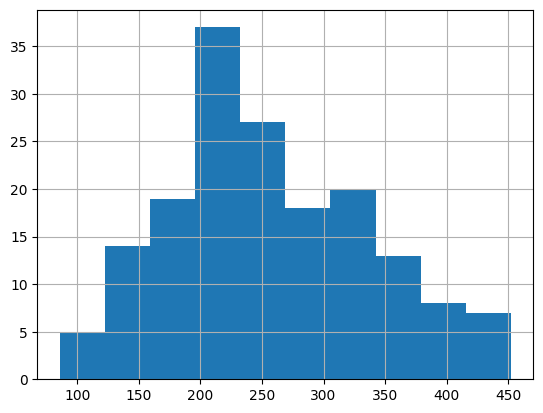

In [70]:
dfxg['Total Dissolved Solids(TDS)'].hist()

In [71]:
X = dfxg.drop('Total Dissolved Solids(TDS)',axis=1)
y = dfxg['Total Dissolved Solids(TDS)']

In [72]:
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.model_selection import train_test_split
!pip install xgboost # Install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [74]:
X_train.shape,X_test.shape

((129, 48), (43, 48))

In [75]:
xgbmodel = XGBRegressor()

In [76]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

In [77]:
X_train

Ammonia-N   BOD  Conductivity  Dissolved O2(DO)  Fecal Coliform  \
Date                                                                          
2021-10-21       0.12  2.90         369.1               5.9           22000   
2020-04-14       0.14  2.00         525.2               7.0             350   
2021-04-07       0.10  3.40         619.8               6.0           54000   
2011-04-05       0.00  1.70         378.0              10.0           21000   
2022-04-07       0.11  2.95         604.5               9.0            1700   
...               ...   ...           ...               ...             ...   
2013-11-12       0.00  2.60         383.0               5.6           70000   
2013-07-08       0.00  3.90         313.0               6.5            1700   
2018-12-07       0.33  6.00         555.0               8.2          140000   
2013-04-01       0.00  4.00         405.0               8.6            4000   
2021-12-30       0.21  2.20         644.5               8.6            7900   

            Fecal Streptococci  Nitrate-N    pH  Temperature(Water)  \
Date                                                                  
2021-10-21               790.0      0.480  7.58                28.0   
2020-04-14                 0.0      0.402  8.27                30.0   
2021-04-07              1100.0      0.330  7.79                31.0   
2011-04-05                 0.0      0.670  7.90                 0.0   
2022-04-07               330.0      0.440  8.22                30.0   
...                        ...        ...   ...                 ...   
2013-11-12                 0.0      0.360  7.52                 0.0   
2013-07-08                 0.0      0.040  7.85                 0.0   
2018-12-07                 0.0      0.390  8.02                 0.0   
2013-04-01                 0.0      0.150  7.73                 0.0   
2021-12-30               790.0      0.160  7.97                21.0   

            Total Coliform  ...  b-Endosulphan  Chlorpyriphos  Dieldrin  \
Date                        ...                                           
2021-10-21           54000  ...            0.0           0.00       0.0   
2020-04-14            2000  ...            0.0           0.00       0.0   
2021-04-07           92000  ...            0.0           0.00       0.0   
2011-04-05           30000  ...            0.0           0.00       0.0   
2022-04-07            4900  ...            0.0           0.00       0.0   
...                    ...  ...            ...            ...       ...   
2013-11-12           90000  ...            0.0           0.00       0.0   
2013-07-08            2200  ...            0.0           0.00       0.0   
2018-12-07          170000  ...            0.0           0.00       0.0   
2013-04-01            7000  ...            0.0           0.12       0.0   
2021-12-30           22000  ...            0.0           0.00       0.0   

            g-BHC  Malathion  o,p-DDT  p,p-DDT  Sulphate   Lead  \
Date                                                              
2021-10-21    0.0     0.0000      0.0      0.0     12.38  0.000   
2020-04-14    0.0     0.0000      0.0      0.0      7.85  0.000   
2021-04-07    0.0     0.0000      0.0      0.0      9.83  0.014   
2011-04-05    0.0     0.0100      0.0      0.0      3.50  0.000   
2022-04-07    0.0     0.0000      0.0      0.0      5.55  0.000   
...           ...        ...      ...      ...       ...    ...   
2013-11-12    0.0     0.0000      0.0      0.0      5.10  0.000   
2013-07-08    0.0     0.0000      0.0      0.0      8.40  0.000   
2018-12-07    0.0     0.0000      0.0      0.0      3.75  0.000   
2013-04-01    0.0     0.6175      0.0      0.0      4.34  0.000   
2021-12-30    0.0     0.0000      0.0      0.0      4.56  0.000   

            Methyl Parathion  
Date                          
2021-10-21               0.0  
2020-04-14               0.0  
2021-04-07               0.0  
2011-04-05               0.0  
2022-04-07               0

In [78]:
print(X_train['Ammonia-N'].dtype)

float64


In [79]:
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

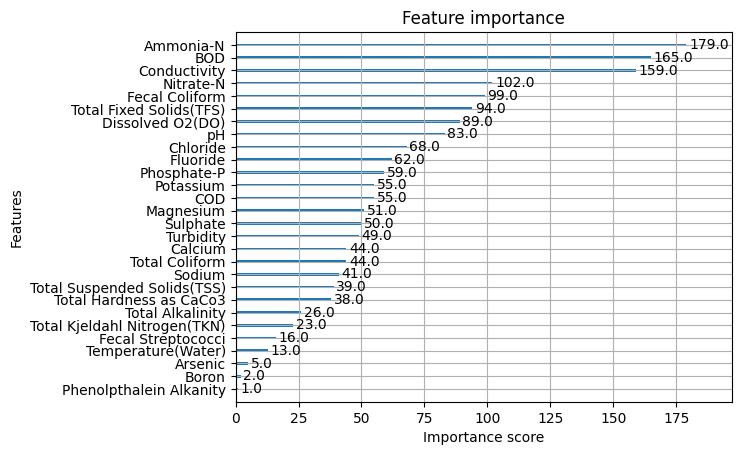

In [80]:
xgb.plot_importance(xgbmodel,ax=plt.gca())
plt.show()

In [81]:
import shap

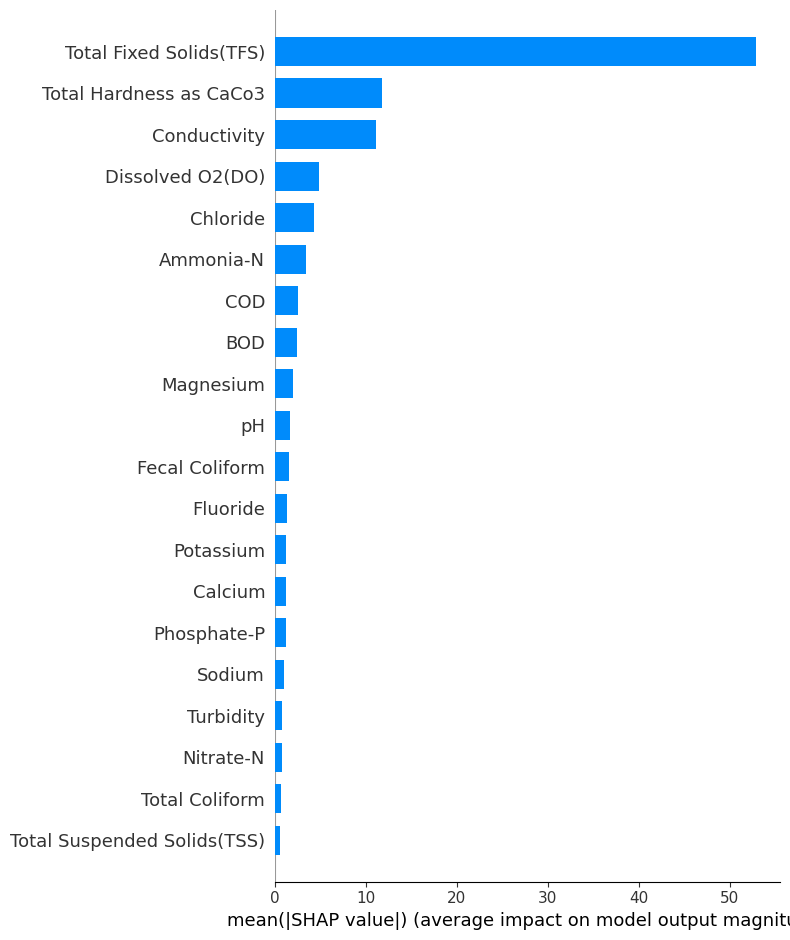

In [82]:
shap_values = shap.TreeExplainer(xgbmodel).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Train performance**

In [83]:
pred_train=xgbmodel.predict(X_train)

In [84]:
print(r2_score(y_train,pred_train))

0.9999999999626764


In [85]:
print(mean_squared_error(y_train,pred_train))

3.1667716939266806e-07


In [86]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 3.1667716939266806e-07
RMSE: 0.0005627407657107028
MAPE: 111348591782.69768
R^2: 0.9999999999626764


In [87]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.0001649922860493118%
MAPE (excluding zeros) for training data using sklearn: 0.0001649922860493118%


In [88]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-------------+-------------+-------------+-------+
|         |         MSE |        RMSE |        MAPE |   R^2 |
+=========+=============+=============+=============+=======+
| Metrics | 3.16677e-07 | 0.000562741 | 0.000164992 |     1 |
+---------+-------------+-------------+-------------+-------+


**Test performance**

In [89]:
predictions = xgbmodel.predict(X_test)

In [90]:
len(y_test)
len(predictions)

43

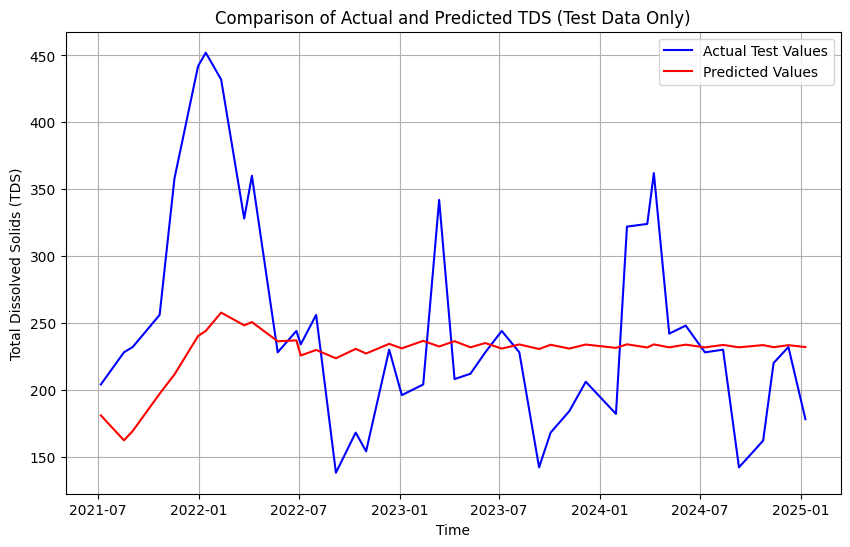

In [91]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Get positional indices for the test data
start_index = train.shape[0]  # First test data point position
end_index = train.shape[0] + len(test) - 1  # Last test data point position

# Train the ARIMA model
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=(4, 1, 3))
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=start_index, end=end_index)
prediction.index = test.index  # Align predictions with test index

# Plot test values and predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='Actual Test Values', color='blue')
plt.plot(test.index, prediction, label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Test Data Only)')
plt.legend()
plt.grid()
plt.show()


In [92]:
print(y_test)
print(predictions)

Date
2017-04-11    272.0
2015-07-06    178.0
2023-06-06    228.0
2019-03-15    260.0
2020-07-06    184.0
2011-06-14    266.0
2015-12-15    436.0
2023-11-06    184.0
2016-09-08    232.0
2016-01-22    280.0
2024-02-19    322.0
2024-09-10    142.0
2015-03-13    328.0
2021-07-06    204.0
2014-10-14    210.0
2014-07-11    208.0
2012-09-11    128.0
2022-02-10    432.0
2018-03-23    392.0
2022-06-27    244.0
2020-09-14    152.0
2018-09-14     86.0
2018-06-15    266.0
2018-11-16    280.0
2021-09-02    232.0
2017-12-08    410.0
2021-01-07    290.0
2022-08-02    256.0
2023-09-12    142.0
2016-03-11    196.0
2017-11-10    236.0
2012-02-13    298.0
2011-10-18    174.0
2024-08-12    230.0
2017-02-10    364.0
2017-07-14    250.0
2017-08-11    196.0
2011-02-22    294.0
2015-10-05    296.0
2020-12-03    344.0
2020-06-02    238.0
2020-01-14    232.0
2016-11-15    336.0
Name: Total Dissolved Solids(TDS), dtype: float64
[326.50922 235.61053 212.51054 223.60583 193.94736 206.68562 435.18753
 190.05722 205

In [93]:
print(mean_squared_error(y_test,predictions))

1052.8341133030765


In [94]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1052.8341133030765
RMSE: 32.44740534007421
MAPE: 0.11643906879683823
R^2: 0.833595507654851


In [95]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")

MAPE: 11.643906879683822%


In [96]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)


MAPE (excluding zeros): 11.643906879683822%


0.11643906879683823

In [97]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1052.83 | 32.4474 | 11.6439 | 0.833596 |
+---------+---------+---------+---------+----------+


129 129


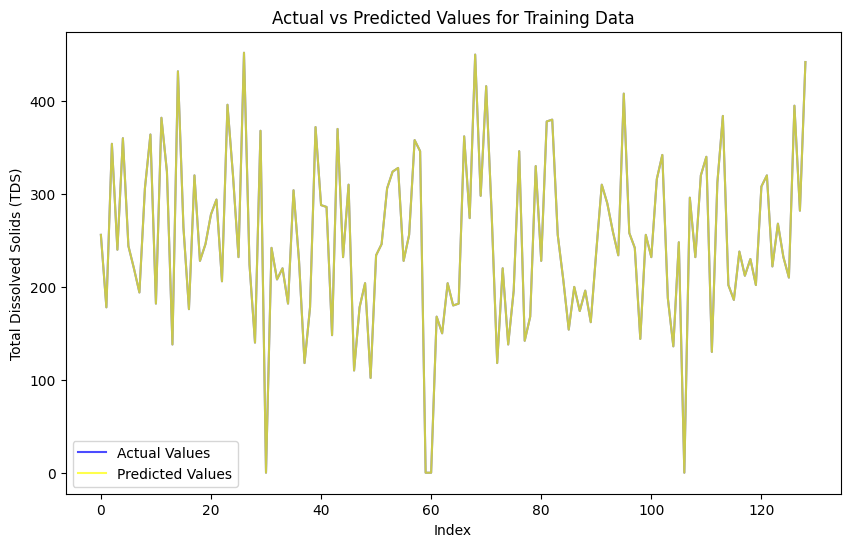

In [98]:
# Check lengths of both datasets
print(len(y_train), len(pred_train))

plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(y_train.values, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(pred_train, label='Predicted Values', color='yellow', alpha=0.7)

plt.title('Actual vs Predicted Values for Training Data')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.legend()
plt.show()


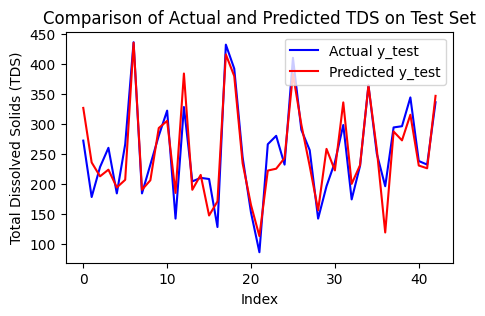

In [99]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(5,3))
plt.plot(y_test.reset_index(drop=True), label='Actual y_test', color='b')
plt.plot(predictions, label='Predicted y_test', color='r')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Set')
plt.legend()
plt.show()


**Feature Selection using correlation**


we will drop the columns which are highly correlated

In [100]:
X_train.corr()

Ammonia-N       BOD  Conductivity  \
Ammonia-N                      1.000000  0.113467     -0.025958   
BOD                            0.113467  1.000000      0.184011   
Conductivity                  -0.025958  0.184011      1.000000   
Dissolved O2(DO)              -0.115744  0.184032      0.521064   
Fecal Coliform                -0.025183  0.076462      0.078199   
Fecal Streptococci             0.054255 -0.099220      0.337064   
Nitrate-N                     -0.016988  0.069627     -0.094898   
pH                             0.077261  0.068170      0.294639   
Temperature(Water)             0.017778 -0.252599      0.148480   
Total Coliform                -0.014586  0.057021      0.053599   
Boron                         -0.040717  0.252573     -0.008850   
Calcium                       -0.060624  0.242129      0.668169   
Chloride                       0.193218  0.215564      0.488301   
COD                           -0.146487  0.557315      0.027325   
Fluoride                       0.094685  0.143962      0.111230   
Magnesium                      0.013055  0.129317      0.478524   
Phenolpthalein Alkanity       -0.015893  0.097156      0.080551   
Phosphate-P                    0.091310 -0.198461      0.021569   
Potassium                      0.088685  0.040647     -0.005134   
Sodium                         0.345431  0.162467      0.414810   
Total Alkalinity               0.035494  0.230108      0.669837   
Total Fixed Solids(TFS)       -0.109469  0.150369      0.538535   
Total Hardness as CaCo3       -0.031721  0.213910      0.722958   
Total Kjeldahl Nitrogen(TKN)  -0.018705  0.202833      0.012028   
Total Suspended Solids(TSS)   -0.044386 -0.038710     -0.227112   
Turbidity                     -0.087374 -0.036279     -0.247778   
Arsenic                       -0.009407  0.071849      0.179637   
Cadmium                             NaN       NaN           NaN   
Chromium Total                -0.048727 -0.045433      0.049254   
Copper                         0.076091  0.097852      0.085120   
Iron                          -0.006910 -0.036759      0.173306   
Mercury                             NaN       NaN           NaN   
Nickel                        -0.048727 -0.045433      0.049254   
Zinc                           0.030434  0.060944      0.222048   
a-BHC                         -0.048727 -0.045433      0.049254   
a-Endosulphan                       NaN       NaN           NaN   
Aldrin                              NaN       NaN           NaN   
Anilophos                           NaN       NaN           NaN   
b-Endosulphan                       NaN       NaN           NaN   
Chlorpyriphos                 -0.019316  0.188299     -0.007450   
Dieldrin                            NaN       NaN           NaN   
g-BHC                               NaN       NaN           NaN   
Malathion                      0.053623  0.170207      0.069552   
o,p-DDT                             NaN       NaN           NaN   
p,p-DDT                             NaN       NaN           NaN   
Sulphate                       0.065073 -0.261747     -0.126397   
Lead                          -0.017009  0.008085      0.130703   
Methyl Parathion              -0.010666 -0.045433     -0.009517   

                              Dissolved O2(DO)  Fecal Coliform  \
Ammonia-N                            -0.115744       -0.025183   
BOD                                   0.184032        0.076462   
Conductivity                          0.521064        0.078199   
Dissolved O2(DO)                      1.000000        0.052179   
Fecal Coliform                        0.052179        1.000000   
Fecal Streptococci                   -0.097353       -0.211977   
Nitrate-N                            -0.078939       -0.041254   
pH                                    0.370654        0.114366   
Temperature(Water)                   -0.213817       -0.361918   
Total Coliform                        0.029830        0.981296   
Boron               

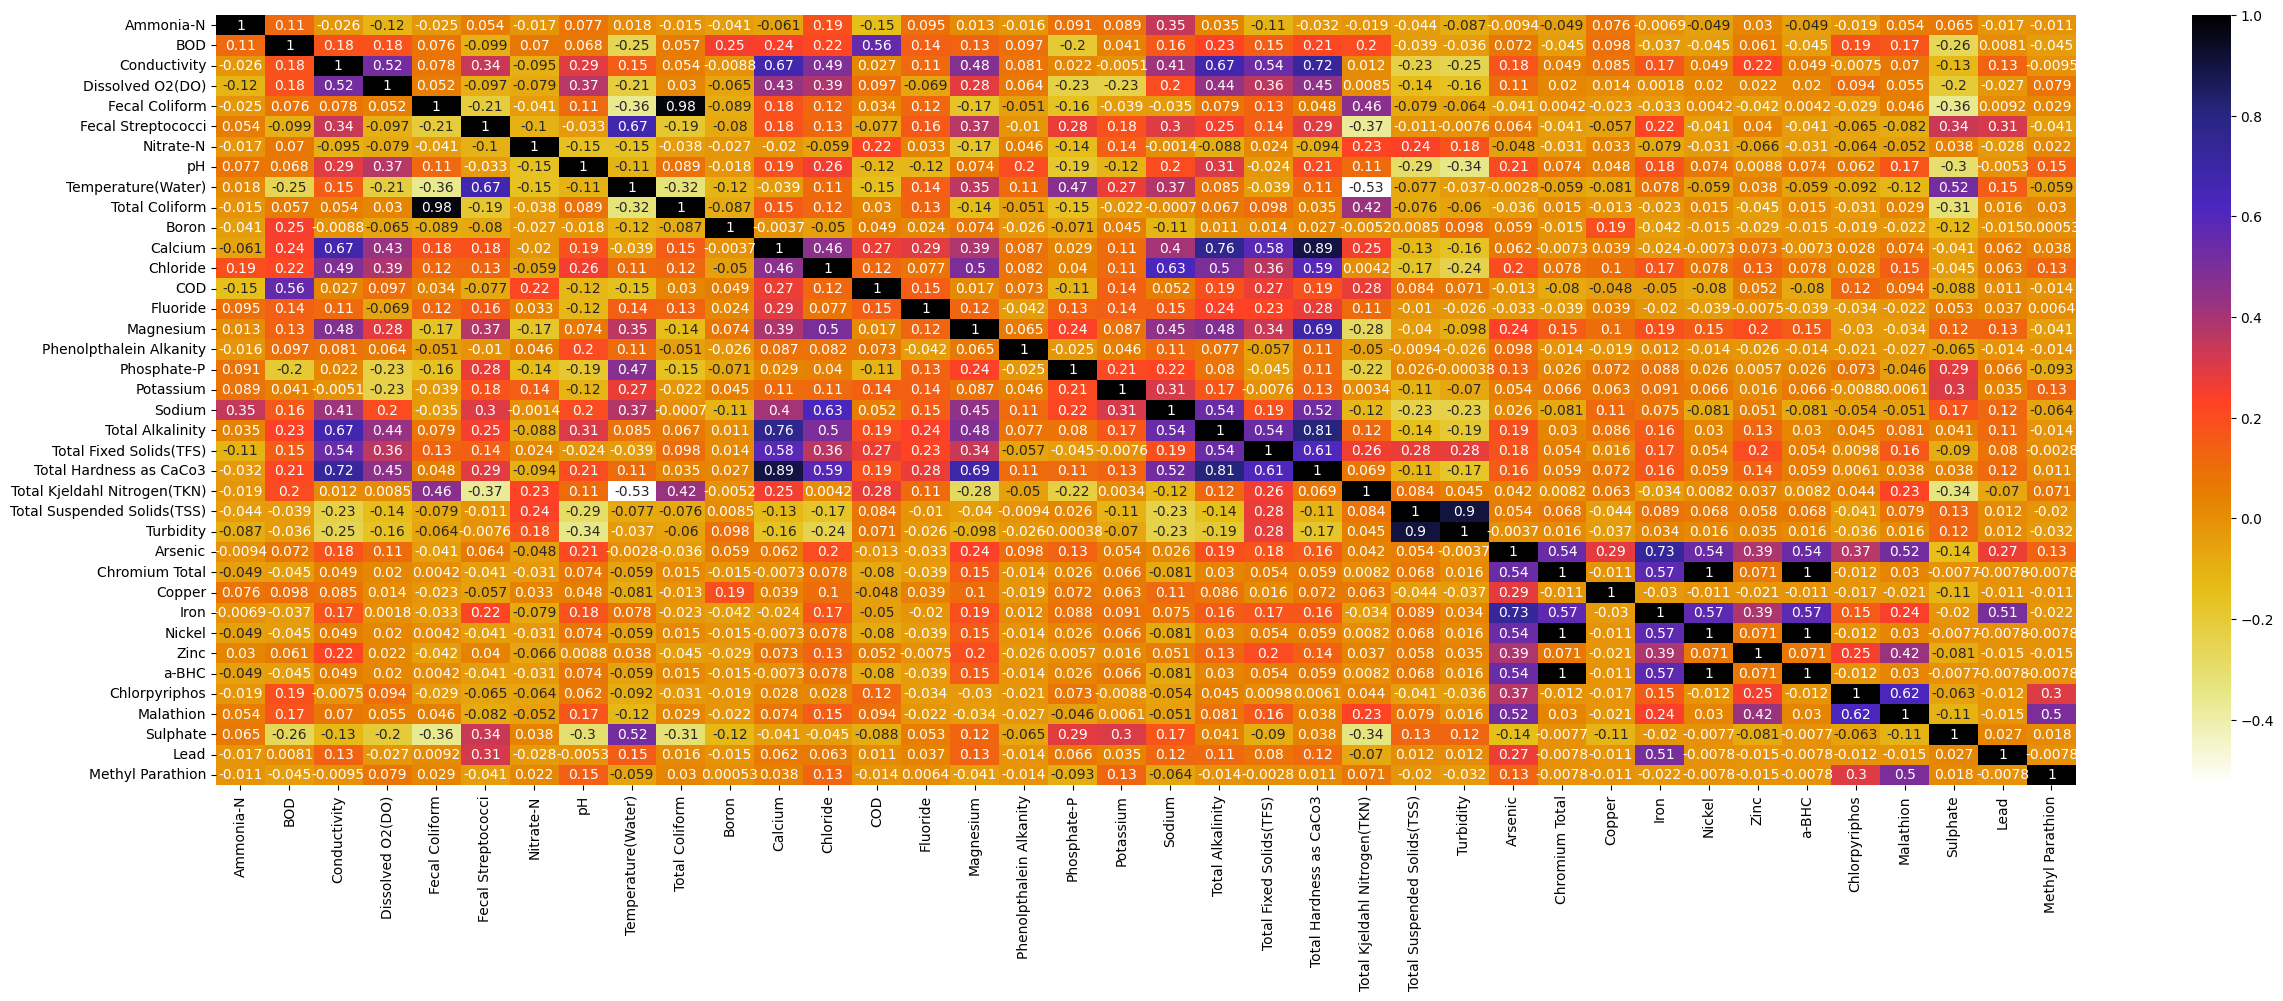

In [101]:
# Compute correlation matrix with NaNs
cor = X_train.corr()

# Drop rows and columns with all NaN values
cor = cor.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the cleaned correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [102]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [103]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

7

In [104]:
corr_features

{'Iron',
 'Nickel',
 'Total Alkalinity',
 'Total Coliform',
 'Total Hardness as CaCo3',
 'Turbidity',
 'a-BHC'}

Removing those columns

In [105]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [106]:
X_test.columns

Index(['Ammonia-N', 'BOD', 'Conductivity', 'Dissolved O2(DO)',
       'Fecal Coliform', 'Fecal Streptococci', 'Nitrate-N', 'pH',
       'Temperature(Water)', 'Boron', 'Calcium', 'Chloride', 'COD', 'Fluoride',
       'Magnesium', 'Phenolpthalein Alkanity', 'Phosphate-P', 'Potassium',
       'Sodium', 'Total Fixed Solids(TFS)', 'Total Kjeldahl Nitrogen(TKN)',
       'Total Suspended Solids(TSS)', 'Arsenic', 'Cadmium', 'Chromium Total',
       'Copper', 'Mercury', 'Zinc', 'a-Endosulphan', 'Aldrin', 'Anilophos',
       'b-Endosulphan', 'Chlorpyriphos', 'Dieldrin', 'g-BHC', 'Malathion',
       'o,p-DDT', 'p,p-DDT', 'Sulphate', 'Lead', 'Methyl Parathion'],
      dtype='object')

In [107]:
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

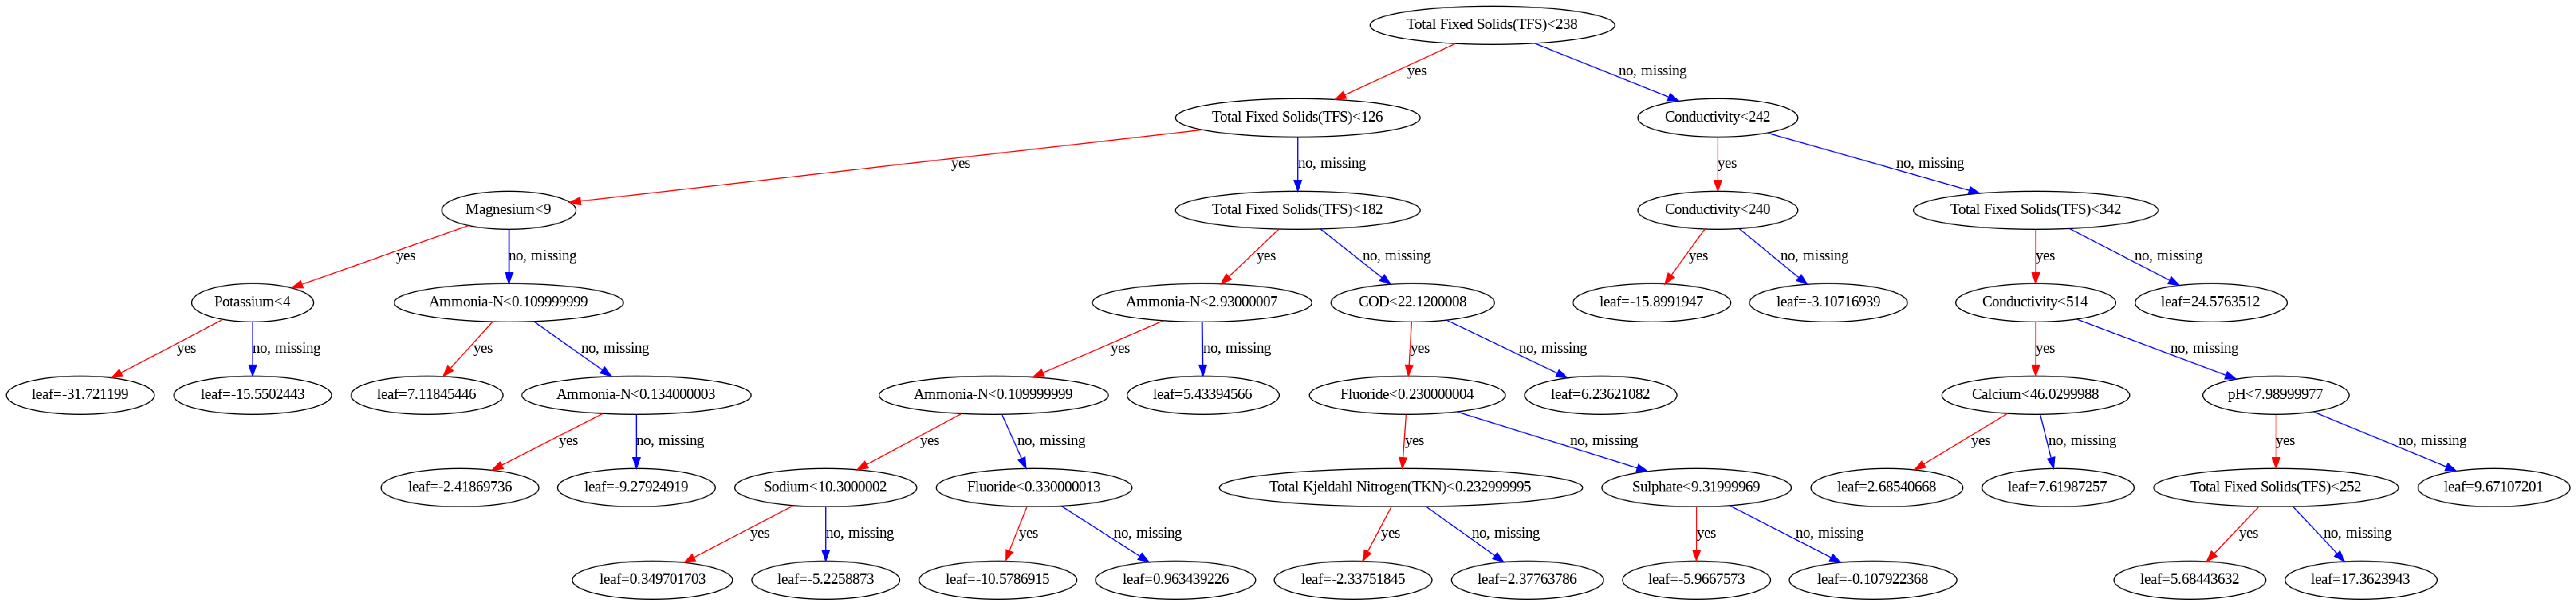

In [108]:
import matplotlib.pyplot
xgb.plot_tree(xgbmodel, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

**Train performance**

In [109]:
pred_train=xgbmodel.predict(X_train)

In [110]:
print(r2_score(y_train,pred_train))

0.9999999999539478


In [111]:
print(y_train)
print(pred_train)

Date
2021-10-21    256.0
2020-04-14    178.0
2021-04-07    354.0
2011-04-05    240.0
2022-04-07    360.0
              ...  
2013-11-12    232.0
2013-07-08    210.0
2018-12-07    395.0
2013-04-01    282.0
2021-12-30    442.0
Name: Total Dissolved Solids(TDS), Length: 129, dtype: float64
[ 2.5599966e+02  1.7799957e+02  3.5399948e+02  2.4000064e+02
  3.5999976e+02  2.4400011e+02  2.1999980e+02  1.9400003e+02
  3.0600061e+02  3.6400034e+02  1.8200146e+02  3.8199954e+02
  3.2400000e+02  1.3799963e+02  4.3199884e+02  2.6399954e+02
  1.7599997e+02  3.2000052e+02  2.2800009e+02  2.4599966e+02
  2.7800015e+02  2.9400046e+02  2.0600012e+02  3.9600003e+02
  3.1999973e+02  2.3200006e+02  4.5199994e+02  2.2399959e+02
  1.3999971e+02  3.6799976e+02 -8.6626958e-04  2.4199992e+02
  2.0799994e+02  2.2000014e+02  1.8200121e+02  3.0400043e+02
  2.2800078e+02  1.1800076e+02  1.7800027e+02  3.7199969e+02
  2.8799905e+02  2.8599988e+02  1.4800188e+02  3.7000092e+02
  2.3200018e+02  3.0999982e+02  1.1000016

In [112]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 3.9073561120706496e-07
RMSE: 0.0006250884827023011
MAPE: 99603188712.18605
R^2: 0.9999999999539478


In [113]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.0001974374728486482%
MAPE (excluding zeros) for training data using sklearn: 0.0001974374728486482%


mape value between 10 to 20 good


less than 10 accurate

In [114]:
import pandas as pd

# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE %": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame
print(metrics_df)

                  MSE      RMSE    MAPE %  R^2
Metrics  3.907356e-07  0.000625  0.000197  1.0


In [115]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-------------+-------------+-------------+-------+
|         |         MSE |        RMSE |        MAPE |   R^2 |
+=========+=============+=============+=============+=======+
| Metrics | 3.90736e-07 | 0.000625088 | 0.000197437 |     1 |
+---------+-------------+-------------+-------------+-------+


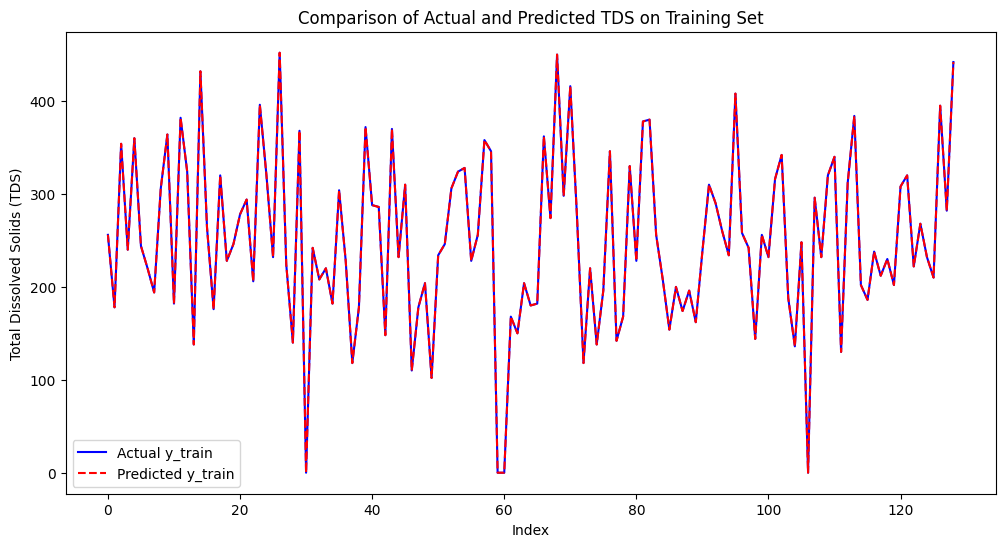

In [116]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()


**Test performance**

In [117]:
predictions = xgbmodel.predict(X_test)
xgb_pred = predictions

In [118]:
print(len(y_test))
print(len(predictions))

43
43


This particular value is causing a lot of error as it is an outlier value.

In [119]:
#y_test.loc['2019-11-15'] = y_test.median()  # or use neighboring values


In [120]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 923.8703343441958
RMSE: 30.39523538885981
MAPE: 0.1130481799740962
R^2: 0.8539787303272597


In [121]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")


MAPE: 11.30481799740962%


In [122]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)


MAPE (excluding zeros): 11.30481799740962%


0.1130481799740962

In [123]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))


+---------+--------+---------+---------+----------+
|         |    MSE |    RMSE |    MAPE |      R^2 |
+=========+========+=========+=========+==========+
| Metrics | 923.87 | 30.3952 | 11.3048 | 0.853979 |
+---------+--------+---------+---------+----------+


In [124]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  30.395235
1    Relative RMSE   0.119601
2  Normalized RMSE   0.086844


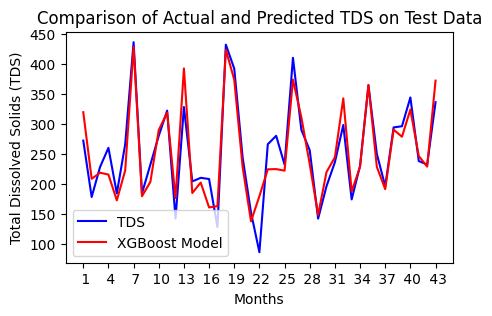

In [125]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(5, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, predictions, label='XGBoost Model', color='r')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Data')
plt.legend()
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.show()


Forecast values for the next 12 months: [np.float32(372.0025), np.float32(188.32565), np.float32(41.11803), np.float32(143.36784), np.float32(36.31374), np.float32(71.49782), np.float32(133.2414), np.float32(220.42195), np.float32(151.39612), np.float32(53.05399), np.float32(139.77814), np.float32(29.034832)]


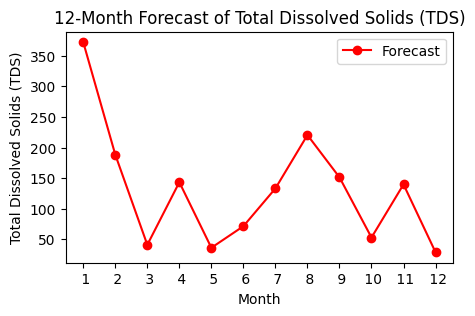

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = xgbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('12-Month Forecast of Total Dissolved Solids (TDS)')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()


# **Lightgbm**

In [127]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd


# Train-test split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

# LightGBM model
#lgbmr = LGBMRegressor(learning_rate=0.1, max_depth=-1, random_state=42)
#lgbmr = LGBMRegressor(learning_rate=0.2, feature_fraction=0.8,max_depth=-1, random_state=42,lambda_l2=1)
#lgbmr = LGBMRegressor(learning_rate=0.2, feature_fraction=0.8,lambda_l2=1)
lgbmr = LGBMRegressor(
    learning_rate=0.05,  # Lower learning rate
    n_estimators=1000,   # More boosting rounds
    num_leaves=31,       # Control complexity
    min_data_in_leaf=10, # Prevent overfitting
    lambda_l2=0.1,       # Reduce regularization strength
    random_state=42
)


# Clean the column names before fitting the model
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores


# Fit the model with early stopping
lgbmr.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

# Make predictions
y_pred = lgbmr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 129, number of used features: 27
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. C

**Train performance**

In [128]:
pred_train=lgbmr.predict(X_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [129]:
print(r2_score(y_train,pred_train))

0.9386895427308071


In [130]:
print(y_train)
print(pred_train)

Date
2021-10-21    256.0
2020-04-14    178.0
2021-04-07    354.0
2011-04-05    240.0
2022-04-07    360.0
              ...  
2013-11-12    232.0
2013-07-08    210.0
2018-12-07    395.0
2013-04-01    282.0
2021-12-30    442.0
Name: Total Dissolved Solids(TDS), Length: 129, dtype: float64
[247.02123265 187.95813933 333.92293673 249.94717448 343.31076669
 242.443536   206.9442755  171.57954233 307.6993361  375.58382723
 202.51846892 353.9292604  313.11822351 148.15883267 381.44276832
 207.61945149 194.43754543 323.19969772 226.73112996 248.70147102
 283.15963075 301.21716225 212.57123259 380.26300293 318.30935743
 233.84768115 397.14413998 201.19150524 160.51844492 354.12597642
  70.58660306 238.559864   217.31422344 229.11579886 219.19154807
 288.15675985 235.74926966 168.35257964 198.2144851  346.06932518
 257.66311547 248.36686024 174.43688417 374.86761366 240.48881512
 304.60821068 133.39624214 183.49449441 210.16770596 111.24140527
 251.13718642 247.82344062 312.13044063 333.27553397

In [131]:
print(mean_squared_error(y_train,pred_train))

520.196324628168


In [132]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 520.196324628168
RMSE: 22.807812797990252
MAPE: 9857172069724842.0
R^2: 0.9386895427308071


In [133]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 6.043870494908498%
MAPE (excluding zeros) for training data using sklearn: 6.043870494908498%


In [134]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+---------+
|         |     MSE |    RMSE |    MAPE |     R^2 |
+=========+=========+=========+=========+=========+
| Metrics | 520.196 | 22.8078 | 6.04387 | 0.93869 |
+---------+---------+---------+---------+---------+


129 129


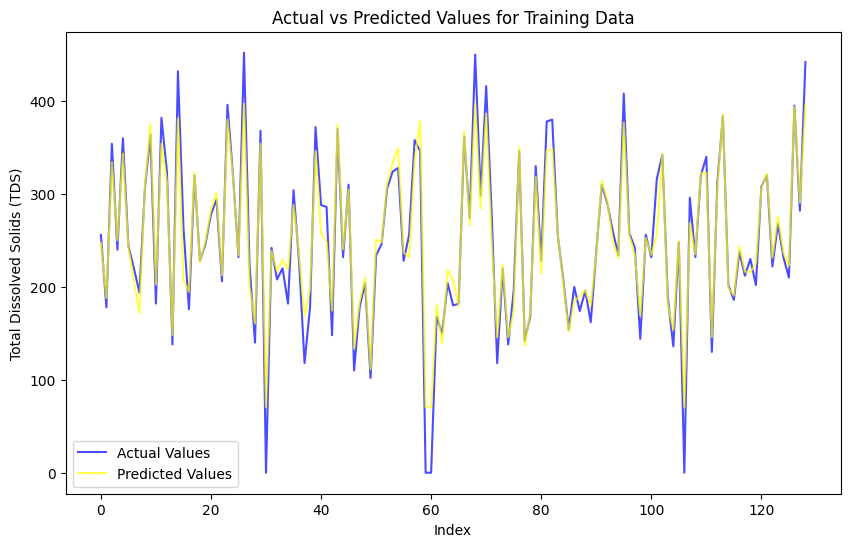

In [135]:
# Check lengths of both datasets
print(len(y_train), len(pred_train))

plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(y_train.values, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(pred_train, label='Predicted Values', color='yellow', alpha=0.7)

plt.title('Actual vs Predicted Values for Training Data')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.legend()
plt.show()


**Test performance**

In [136]:
predictions = lgbmr.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [137]:
len(y_test)
len(predictions)

43

In [138]:
#y_test.loc['2019-11-15'] = y_test.median()

In [139]:
print(y_test)
print(predictions)

Date
2017-04-11    272.0
2015-07-06    178.0
2023-06-06    228.0
2019-03-15    260.0
2020-07-06    184.0
2011-06-14    266.0
2015-12-15    436.0
2023-11-06    184.0
2016-09-08    232.0
2016-01-22    280.0
2024-02-19    322.0
2024-09-10    142.0
2015-03-13    328.0
2021-07-06    204.0
2014-10-14    210.0
2014-07-11    208.0
2012-09-11    128.0
2022-02-10    432.0
2018-03-23    392.0
2022-06-27    244.0
2020-09-14    152.0
2018-09-14     86.0
2018-06-15    266.0
2018-11-16    280.0
2021-09-02    232.0
2017-12-08    410.0
2021-01-07    290.0
2022-08-02    256.0
2023-09-12    142.0
2016-03-11    196.0
2017-11-10    236.0
2012-02-13    298.0
2011-10-18    174.0
2024-08-12    230.0
2017-02-10    364.0
2017-07-14    250.0
2017-08-11    196.0
2011-02-22    294.0
2015-10-05    296.0
2020-12-03    344.0
2020-06-02    238.0
2020-01-14    232.0
2016-11-15    336.0
Name: Total Dissolved Solids(TDS), dtype: float64
[303.52293375 233.54169163 226.75311651 234.59960169 206.39437545
 233.29760165 385.8

In [140]:
print(mean_squared_error(y_test,predictions))

1044.8788371768196


In [141]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1044.8788371768196
RMSE: 32.32458564586435
MAPE: 0.12786531537552845
R^2: 0.8348528697297767


In [142]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")

MAPE: 12.786531537552845%


In [143]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 12.786531537552845%


0.12786531537552845

In [144]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1044.88 | 32.3246 | 12.7865 | 0.834853 |
+---------+---------+---------+---------+----------+


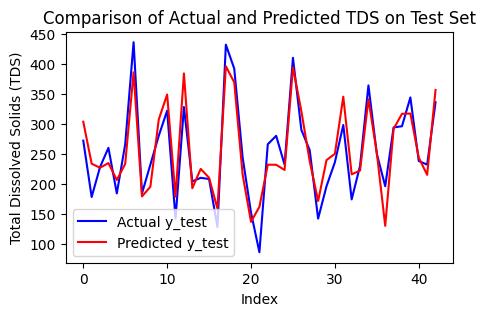

In [145]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(5,3))
plt.plot(y_test.reset_index(drop=True), label='Actual y_test', color='b')
plt.plot(predictions, label='Predicted y_test', color='r')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Set')
plt.legend()
plt.show()

Feature selection

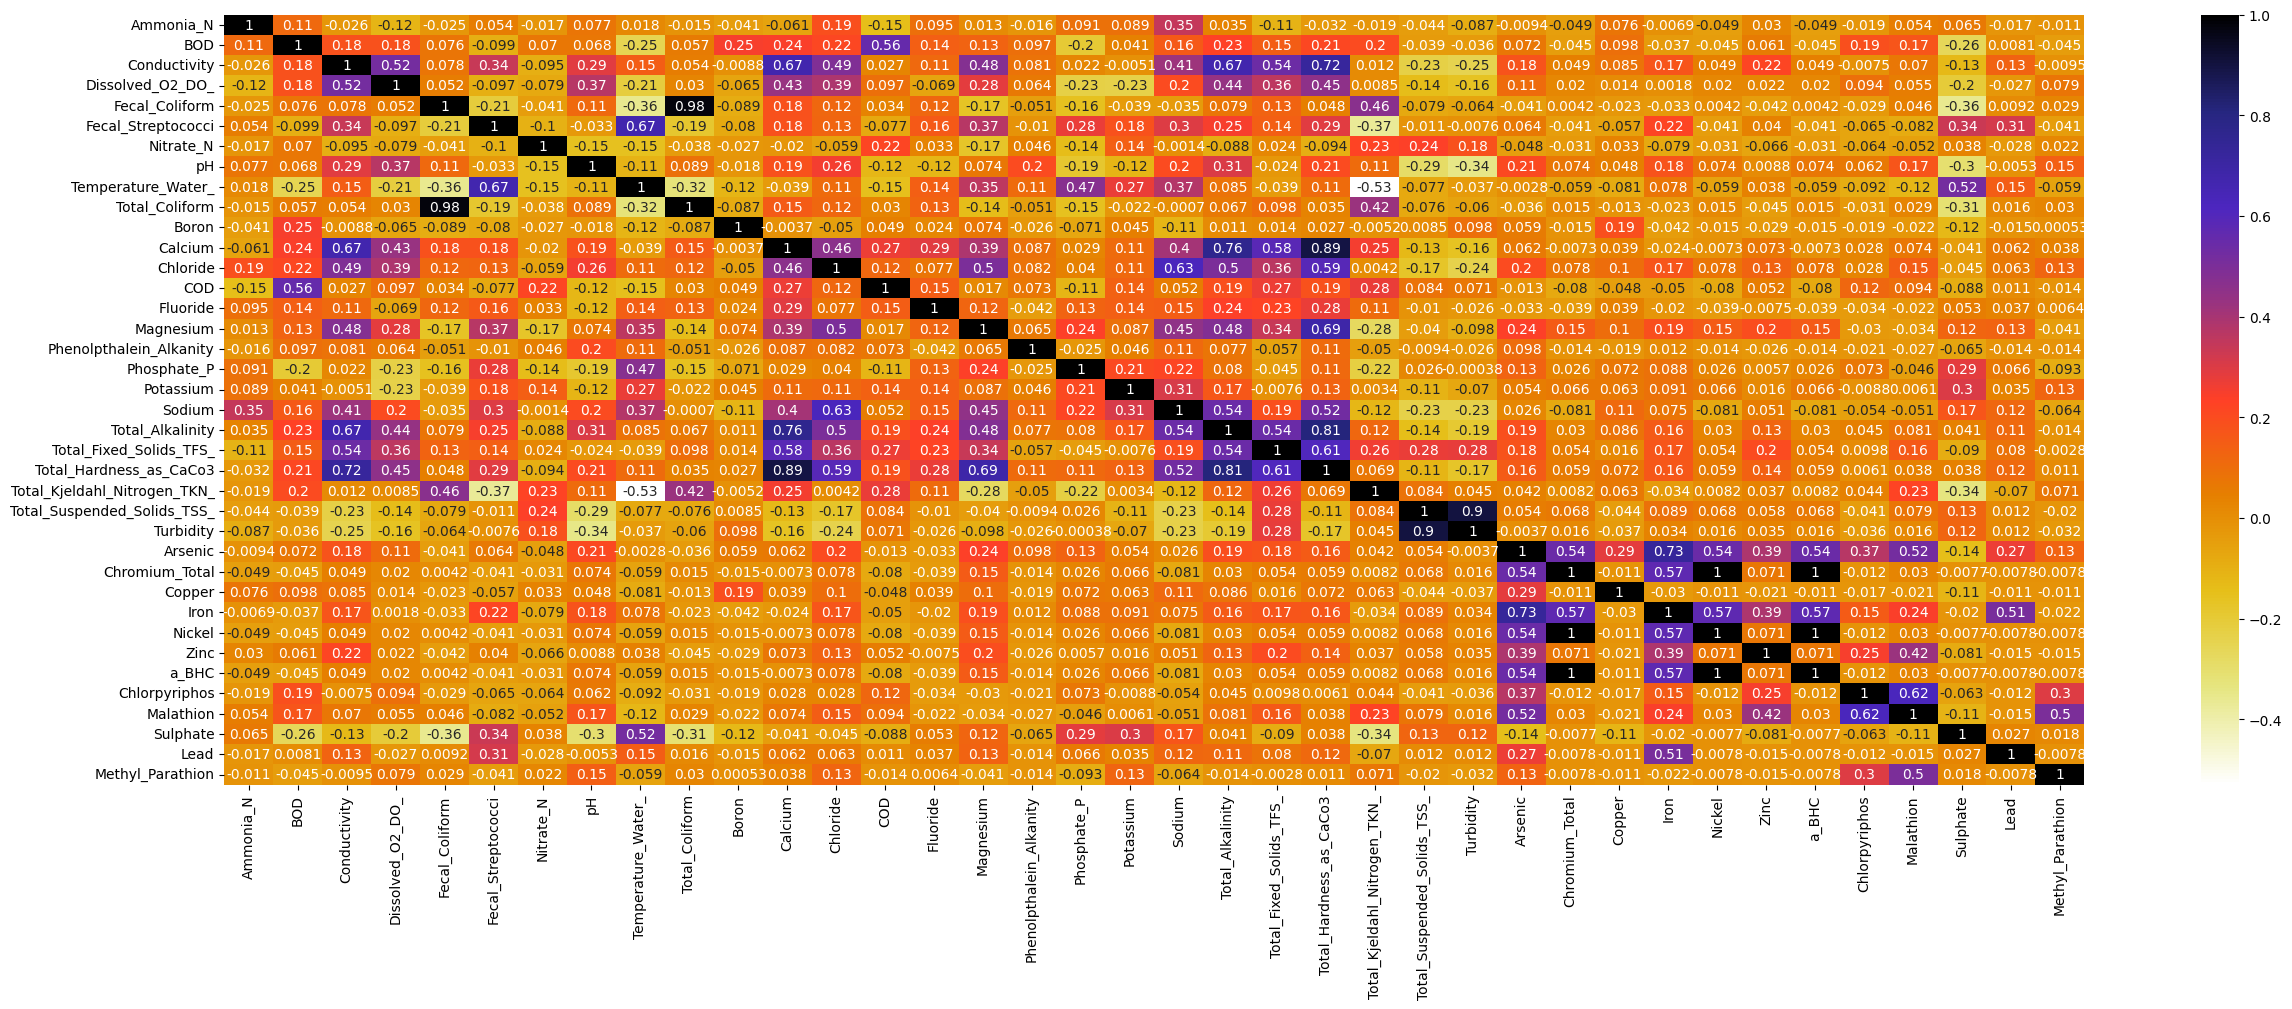

In [146]:
# Compute correlation matrix with NaNs
cor = X_train.corr()

# Drop rows and columns with all NaN values
cor = cor.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the cleaned correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [147]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [148]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

7

In [149]:
corr_features

{'Iron',
 'Nickel',
 'Total_Alkalinity',
 'Total_Coliform',
 'Total_Hardness_as_CaCo3',
 'Turbidity',
 'a_BHC'}

In [150]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [151]:
lgbmr.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 129, number of used features: 22
[LightGBM] [Info] Start training from score 249.961240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(lambda_l2=0.1, learning_rate=0.05, min_data_in_leaf=10,
              n_estimators=1000, random_state=42)

**Train performance**

In [152]:
pred_train=lgbmr.predict(X_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [153]:
print(r2_score(y_train,pred_train))

0.9999984380733374


In [154]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 0.013252364203656854
RMSE: 0.11511891331860657
MAPE: 27358538349541.56
R^2: 0.9999984380733374


In [155]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.014350004043629384%
MAPE (excluding zeros) for training data using sklearn: 0.014350004043629384%


In [156]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-----------+----------+---------+----------+
|         |       MSE |     RMSE |    MAPE |      R^2 |
+=========+===========+==========+=========+==========+
| Metrics | 0.0132524 | 0.115119 | 0.01435 | 0.999998 |
+---------+-----------+----------+---------+----------+


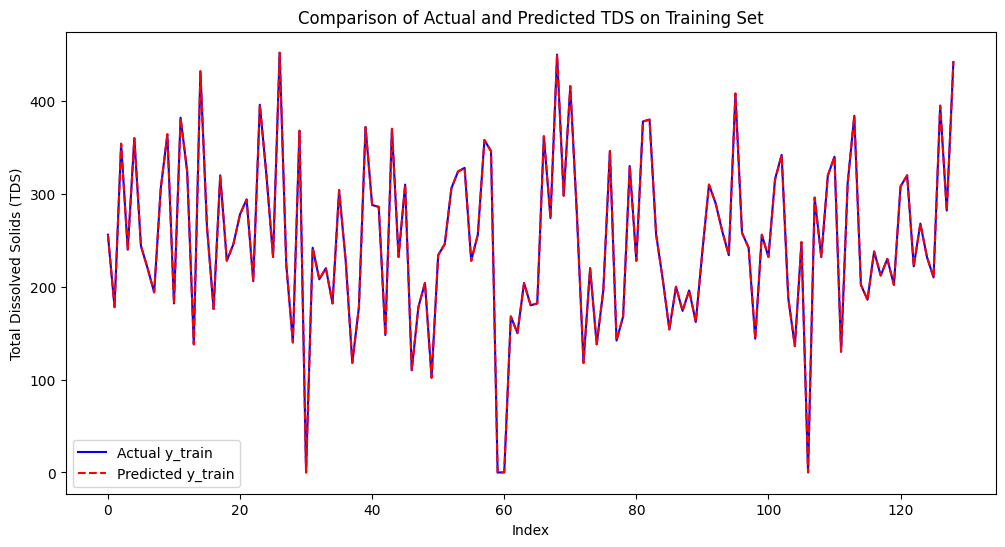

In [157]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()

**Test performance**

In [158]:
predictions = lgbmr.predict(X_test)
lgb_pred = predictions

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [159]:
print(y_test)
print(predictions)

Date
2017-04-11    272.0
2015-07-06    178.0
2023-06-06    228.0
2019-03-15    260.0
2020-07-06    184.0
2011-06-14    266.0
2015-12-15    436.0
2023-11-06    184.0
2016-09-08    232.0
2016-01-22    280.0
2024-02-19    322.0
2024-09-10    142.0
2015-03-13    328.0
2021-07-06    204.0
2014-10-14    210.0
2014-07-11    208.0
2012-09-11    128.0
2022-02-10    432.0
2018-03-23    392.0
2022-06-27    244.0
2020-09-14    152.0
2018-09-14     86.0
2018-06-15    266.0
2018-11-16    280.0
2021-09-02    232.0
2017-12-08    410.0
2021-01-07    290.0
2022-08-02    256.0
2023-09-12    142.0
2016-03-11    196.0
2017-11-10    236.0
2012-02-13    298.0
2011-10-18    174.0
2024-08-12    230.0
2017-02-10    364.0
2017-07-14    250.0
2017-08-11    196.0
2011-02-22    294.0
2015-10-05    296.0
2020-12-03    344.0
2020-06-02    238.0
2020-01-14    232.0
2016-11-15    336.0
Name: Total Dissolved Solids(TDS), dtype: float64
[317.27719694 208.2455346  222.51576885 220.44231607 196.39103409
 211.21419199 400.6

In [160]:
#y_test.loc['2019-11-15'] = y_test.median()  # or use neighboring values

In [161]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 1127.0806282328047
RMSE: 33.572021509477274
MAPE: 0.13340472331477762
R^2: 0.8218605596044726


In [162]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 13.340472331477763%


0.13340472331477762

In [163]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+--------+---------+----------+
|         |     MSE |   RMSE |    MAPE |      R^2 |
+=========+=========+========+=========+==========+
| Metrics | 1127.08 | 33.572 | 13.3405 | 0.821861 |
+---------+---------+--------+---------+----------+


In [164]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  33.572022
1    Relative RMSE   0.132101
2  Normalized RMSE   0.095920


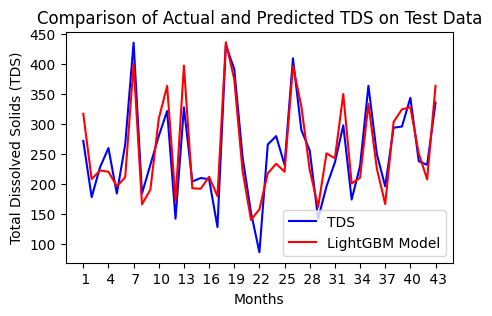

In [165]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(5, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, predictions, label='LightGBM Model', color='r')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Data')
plt.legend()
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.show()


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current v

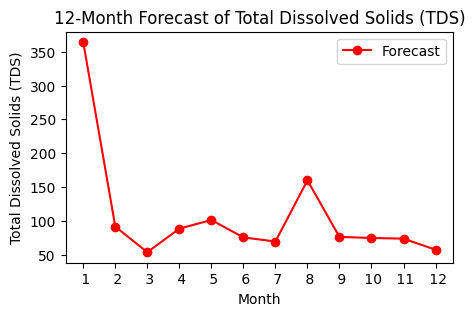

In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = lgbmr.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('12-Month Forecast of Total Dissolved Solids (TDS)')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()


In [167]:
forecast

[np.float64(364.03293325250013),
 np.float64(91.49355764150071),
 np.float64(53.625942432693336),
 np.float64(88.48329707660584),
 np.float64(101.2520974471206),
 np.float64(75.50697750495972),
 np.float64(69.43228553089436),
 np.float64(159.9026681970888),
 np.float64(76.27073558733693),
 np.float64(74.72426480794697),
 np.float64(73.66114403539336),
 np.float64(57.3729803226032)]

# **Catboost**

In [168]:
!pip install catboost

In [169]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd


# Train-test split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

cbmodel = CatBoostRegressor(loss_function='RMSE')



# Clean the column names before fitting the model
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores


# Fit the model with early stopping
cbmodel.fit(
    X_train, y_train,verbose=100
)

# Make predictions
y_pred = cbmodel.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Learning rate set to 0.029625
0:	learn: 90.8452130	total: 48.4ms	remaining: 48.3s
100:	learn: 31.3162700	total: 578ms	remaining: 5.15s
200:	learn: 17.3517648	total: 1.08s	remaining: 4.31s
300:	learn: 10.4020309	total: 1.38s	remaining: 3.21s
400:	learn: 6.6741522	total: 1.68s	remaining: 2.51s
500:	learn: 4.1211422	total: 1.86s	remaining: 1.85s
600:	learn: 2.6164379	total: 2.05s	remaining: 1.36s
700:	learn: 1.6957235	total: 2.49s	remaining: 1.06s
800:	learn: 1.1075377	total: 3.06s	remaining: 761ms
900:	learn: 0.7303076	total: 3.72s	remaining: 409ms
999:	learn: 0.4736073	total: 4.4s	remaining: 0us
MSE: 1339.72
RMSE: 36.60
MAE: 29.13
R^2 Score: 0.79


Feature selection

In [170]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [171]:
X_test.columns

Index(['Ammonia_N', 'BOD', 'Conductivity', 'Dissolved_O2_DO_',
       'Fecal_Coliform', 'Fecal_Streptococci', 'Nitrate_N', 'pH',
       'Temperature_Water_', 'Boron', 'Calcium', 'Chloride', 'COD', 'Fluoride',
       'Magnesium', 'Phenolpthalein_Alkanity', 'Phosphate_P', 'Potassium',
       'Sodium', 'Total_Fixed_Solids_TFS_', 'Total_Kjeldahl_Nitrogen_TKN_',
       'Total_Suspended_Solids_TSS_', 'Arsenic', 'Cadmium', 'Chromium_Total',
       'Copper', 'Mercury', 'Zinc', 'a_Endosulphan', 'Aldrin', 'Anilophos',
       'b_Endosulphan', 'Chlorpyriphos', 'Dieldrin', 'g_BHC', 'Malathion',
       'o_p_DDT', 'p_p_DDT', 'Sulphate', 'Lead', 'Methyl_Parathion'],
      dtype='object')

In [172]:
cbmodel.fit(X_train,y_train)

Learning rate set to 0.029625
0:	learn: 91.1123018	total: 12.5ms	remaining: 12.5s
1:	learn: 89.7299521	total: 15.3ms	remaining: 7.63s
2:	learn: 88.3600215	total: 35.6ms	remaining: 11.8s
3:	learn: 86.9760980	total: 42.7ms	remaining: 10.6s
4:	learn: 85.5219251	total: 45.4ms	remaining: 9.04s
5:	learn: 84.3304422	total: 52.6ms	remaining: 8.71s
6:	learn: 82.9916528	total: 56.6ms	remaining: 8.03s
7:	learn: 81.9545817	total: 61.1ms	remaining: 7.57s
8:	learn: 81.1668628	total: 65.1ms	remaining: 7.17s
9:	learn: 79.9711939	total: 70.5ms	remaining: 6.97s
10:	learn: 78.8614568	total: 73.5ms	remaining: 6.61s
11:	learn: 77.7927495	total: 79.9ms	remaining: 6.58s
12:	learn: 76.8889555	total: 86.5ms	remaining: 6.56s
13:	learn: 75.8152102	total: 104ms	remaining: 7.32s
14:	learn: 74.7579792	total: 106ms	remaining: 6.95s
15:	learn: 73.6726914	total: 112ms	remaining: 6.92s
16:	learn: 72.6984925	total: 117ms	remaining: 6.77s
17:	learn: 71.5303528	total: 121ms	remaining: 6.59s
18:	learn: 70.5951288	total: 12

**Train performance**

In [173]:
pred_train=cbmodel.predict(X_train)

In [174]:
print(r2_score(y_train,pred_train))

0.999957617842659


In [175]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 0.3595967712622644
RMSE: 0.5996638819057426
MAPE: 60634234903221.58
R^2: 0.999957617842659


In [176]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.21156945946151748%
MAPE (excluding zeros) for training data using sklearn: 0.21156945946151748%


In [177]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+----------+----------+----------+----------+
|         |      MSE |     RMSE |     MAPE |      R^2 |
+=========+==========+==========+==========+==========+
| Metrics | 0.359597 | 0.599664 | 0.211569 | 0.999958 |
+---------+----------+----------+----------+----------+


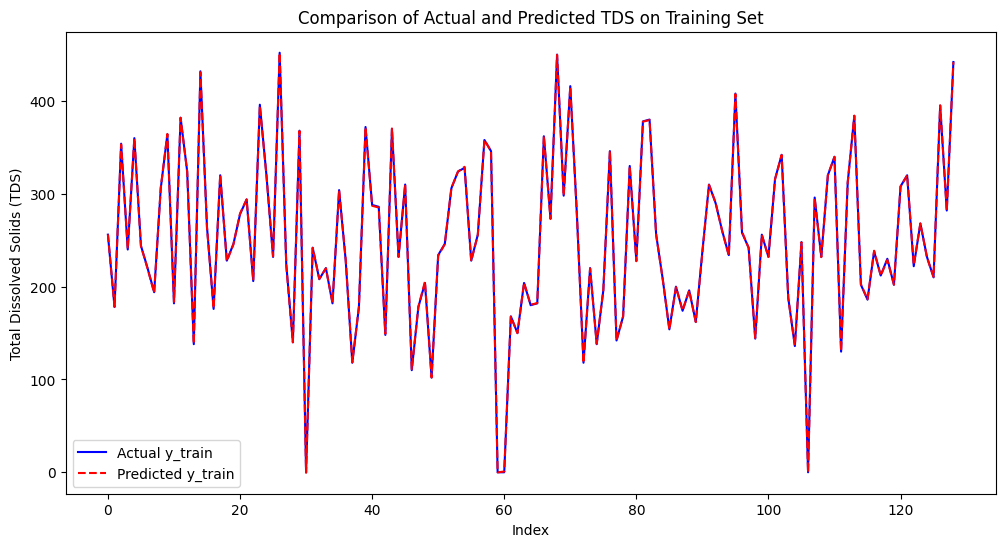

In [178]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()


**Test performance**

In [179]:
predictions = cbmodel.predict(X_test)
cb_pred = predictions

In [180]:
#y_test.loc['2019-11-15'] = y_test.median()

In [181]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1302.3279170486678
RMSE: 36.08778071658976
MAPE: 0.13620386175625704
R^2: 0.7941620496855859


In [182]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 13.620386175625704%


0.13620386175625704

In [183]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))


+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1302.33 | 36.0878 | 13.6204 | 0.794162 |
+---------+---------+---------+---------+----------+


In [184]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  36.087781
1    Relative RMSE   0.142000
2  Normalized RMSE   0.103108


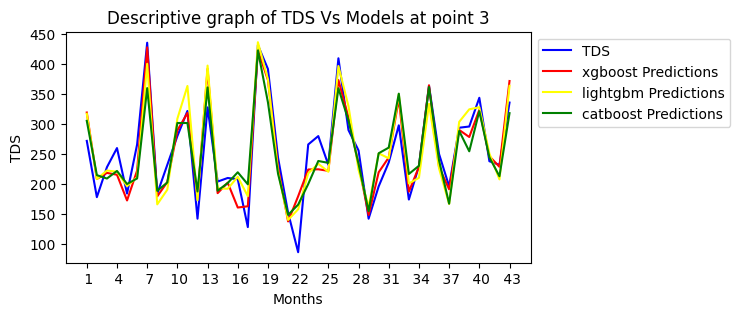

In [185]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(6, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, xgb_pred, label='xgboost Predictions', color='red')
plt.plot(months, lgb_pred, label='lightgbm Predictions', color='yellow')
plt.plot(months, cb_pred, label='catboost Predictions', color='green')
plt.xlabel('Months')
plt.ylabel('TDS')
plt.title('Descriptive graph of TDS Vs Models at point 3')
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Forecast values for the next 12 months: [np.float64(318.35040962082064), np.float64(213.8143615667014), np.float64(188.5703501615344), np.float64(192.7647581435076), np.float64(180.82036509871688), np.float64(170.1135151308955), np.float64(202.4984612349961), np.float64(231.3988175496476), np.float64(188.26116125756556), np.float64(226.67734114342628), np.float64(192.96681939680633), np.float64(185.15058537386)]


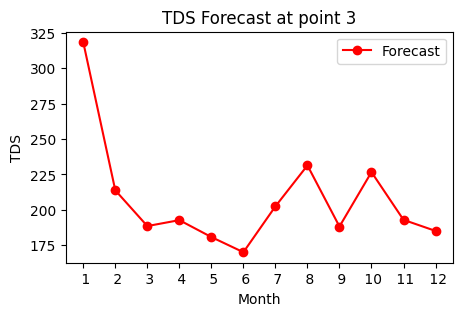

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = cbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('TDS')
plt.title('TDS Forecast at point 3')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()

In [192]:
db


Total Dissolved Solids(TDS)
Date                                   
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        290.0
2025-05-05                        212.0
2025-06-02                        220.0

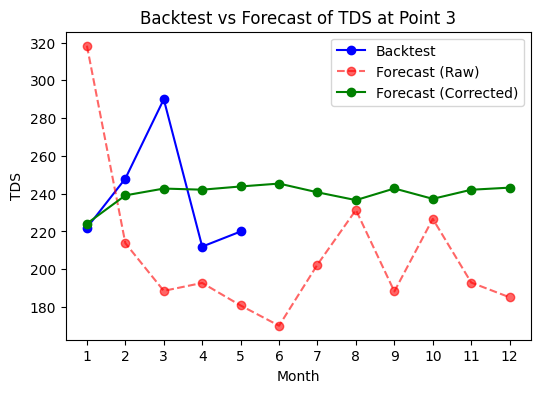

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Backtest data (last 5 points from db)
backtest = db['Total Dissolved Solids(TDS)'].tail(5).values

# Forecast data (12 points)
forecast = []
future_X = X_test.tail(1).copy()
current_X = future_X.copy()

for _ in range(12):
    pred = cbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next step
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

forecast = np.array(forecast)

# ----- Linear bias correction -----
overlap_len = len(backtest)
reg = LinearRegression().fit(forecast[:overlap_len].reshape(-1, 1), backtest)
forecast_corrected = reg.predict(forecast.reshape(-1, 1))

# ----- Plot -----
plt.figure(figsize=(6,4))

# Backtest (blue line, 5 points)
plt.plot(range(1, len(backtest)+1), backtest, marker='o', color='blue', label='Backtest')

# Forecast raw (red dashed)
plt.plot(range(1, len(forecast)+1), forecast, marker='o', linestyle="--", color='red', alpha=0.6, label='Forecast (Raw)')

# Forecast corrected (green solid)
plt.plot(range(1, len(forecast_corrected)+1), forecast_corrected, marker='o', color='green', label='Forecast (Corrected)')

plt.xlabel('Month')
plt.ylabel('TDS')
plt.title('Backtest vs Forecast of TDS at Point 3')
plt.xticks(range(1, max(len(backtest), len(forecast))+1))  # months 1...12
plt.legend()
plt.show()
